<h3><b>Importing Libraries</b></h3>

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [168]:
#provide the dataset location and load using the pandas library
dataset = pd.read_csv('/content/drive/MyDrive/Appliance Energy Prediction/energy_data_set.csv')

<h3><b>Analyse the dataset</b></h3>

In [54]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [142]:
dataset.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [6]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
dataset.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

**Appliances (Target column)**


*  Mean = 97.69 Wh — average energy usage is around 98 Wh.

*  Max = 1080 Wh — in some time intervals, usage spikes a lot.

*  Std = 102.52 — that’s a high standard deviation, meaning energy usage varies a lot.
* 75% = 100 Wh, so most of the time, usage is below 100 Wh, but some outliers go above 1000.

**lights**

*  Most of the time it's 0 (25%, 50%, and 75% are all 0), but sometimes it goes up to 70 Wh.

*  Not used frequently — could be less important for predicting total appliance energy.

**T1 to T9 — Indoor temperatures (°C)**

*  These are temperatures from different rooms/zones.

*  They range from ~15–30°C.

*  Mean values are around 20–22°C.

*  These values will likely influence how much heating/cooling is used → affecting energy use.

**RH_1 to RH_9 — Indoor humidity (%)**

*  RH = Relative Humidity

*  These correspond to the temperature sensors (RH_1 with T1, and so on).

*  Higher humidity might impact HVAC system use.

---

NSM = Number of seconds since midnight — helps track time of day.

WeekStatus = Whether the day is a Weekday or Weekend — energy use is likely different.

Day_of_week = 0 = Sunday, …, 6 = Saturday — helps track patterns across days.







<h3><b>Data Cleaning</b></h3>

In [9]:
#Checking for Duplicate Rows
duplicate_count = dataset[dataset.duplicated()].shape
duplicate_count

(0, 29)


*   All rows are unique, and there are no duplicate rows in the dataset.


In [10]:
#Missing Values/Null values Count
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


*  There are no missing values in any of the columns.




<h3><b>Exploratory Data Analysis</b></h3>

In [196]:
df_energy = dataset.copy()
df_energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

<h6><b>Energy usage over time</b></h6>

In [198]:
# Convert 'date' column to datetime format, so that we could use it for analyse with time series functionality
df_energy['date'] = pd.to_datetime(df_energy['date'])

In [199]:
# Converting date into datetime
df_energy['date'] = df_energy['date'].astype('datetime64[ns]')
df_energy['Date'] = pd.to_datetime(df_energy['date']).dt.date
df_energy['Time'] = pd.to_datetime(df_energy['date']).dt.time
df_energy['hour'] = df_energy['date'].dt.hour
df_energy['month'] = df_energy['date'].dt.month
df_energy['day_of_week'] = df_energy['date'].dt.dayofweek

df_energy= df_energy.drop(["date"], axis=1)
df_energy

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...  Windspeed  Visibility  \
0      19.790000  44.730000  19.000000  45.566667  ...   7.000000   63.000000   
1      19.790000  44.790000  19.000000  45.992500  ...   6.666667   59.166667   
2      19.790000  44.933333  18.926667  45.890000  ...   6.333333   55.333333   
3      19.790000  45.000000  18.890000  45.723333  ...   6.000000   51.500000   
4      19.790000  45.000000  18.890000  45.530000  ...   5.666667   47.666667   
...          ...        ...        ...        ...  ...        ...         ...   
19730  27.200000  41.163333  24.700000  45.590000  ...   3.333333   23.666667   
19731  27.133333  41.223333  24.700000  45.590000  ...   3.500000   24.500000   
19732  27.050000  41.690000  24.700000  45.730000  ...   3.666667   25.333333   
19733  26.890000  41.290000  24.700000  45.790000  ...   3.833333   26.166667   
19734  26.823333  41.156667  24.700000  45.963333  ...   4.000000   27.000000   

       Tdewpoint        rv1        rv2        Date      Time  hour  month  \
0       5.300000  13.275433  13.275433  2016-01-11  17:00:00    17      1   
1       5.200000  18.606195  18.606195  2016-01-11  17:10:00    17      1   
2       5.100000  28.642668  28.642668  2016-01-11  17:20:00    17      1   
3       5.000000  45.410389  45.410389  2016-01-11  17:30:00    17      1   
4       4.900000  10.084097  10.084097  2016-01-11  17:40:00    17      1   
...          ...        ...        ...         ...       ...   ...    ...   
19730  13.333333  43.096812  43.096812  2016-05-27  17:20:00    17      5   
19731  13.300000  49.282940  49.282940  2016-05-27  17:30:00    17      5   
19732  13.266667  29.199117  29.199117  2016-05-27  17:40:00    17      5   
19733  13.233333   6.322784   6.322784  2016-05-27  17:50:00    17      5   
19734  13.200000  34.118851  34.118851  2016-05-27  18:00:00    18      5   

       day_of_week  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
19730            4  
19731            4  
19732            4  
19733            4  
19734            4  

[19735 rows x 33 columns]

Hourly distribution of target variable

In [15]:
# Calculate the total energy consumed by the appliance per hour
app_hour = df_energy.groupby(by='hour',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_hour.sort_values(by='Appliances',ascending=False)

hour  Appliances
18    18      156670
17    17      133600
19    19      117600
11    11      109430
20    20      104380
10    10      103060
13    13      102540
12    12      101630
16    16       98560
9      9       92710
14    14       89010
8      8       87250
15    15       86990
21    21       79320
7      7       64650
22    22       56840
6      6       47440
23    23       46840
0      0       43390
5      5       43350
1      1       42190
4      4       40570
2      2       40340
3      3       39650

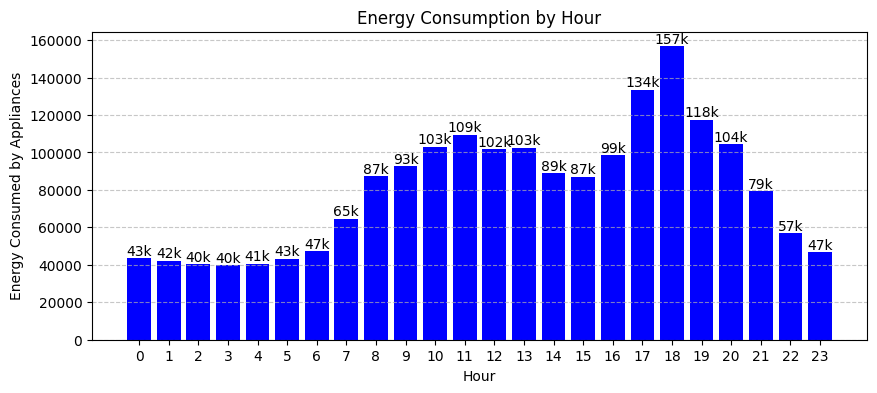

In [16]:
# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_hour['hour'], app_hour['Appliances'], color='blue')  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Hour')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Hour')  # Set the title
plt.xticks(app_hour['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

Obsevation:


1.   Highest electricity consumption occurs between 17:00 pm and 20:00 pm.
2.   Lowest electricity consumption is observed between 23:00 pm and 06:00 pm.



Weekday distribution of target variable

In [17]:
# Calculate the total energy consumed by the appliance per hour
app_week_day = df_energy.groupby(by='day_of_week',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_week_day.sort_values(by='Appliances',ascending=False)

day_of_week  Appliances
0            0      309610
4            4      297650
5            5      290690
3            3      260450
6            6      259690
2            2      259000
1            1      250920

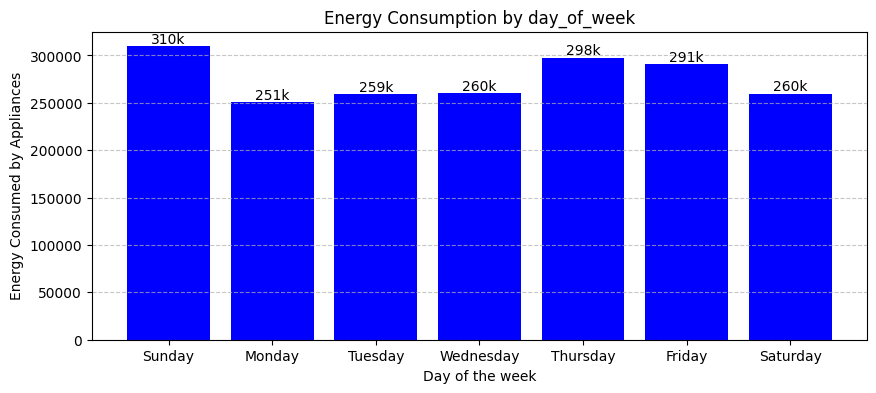

In [18]:
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Appliances'], color='blue')  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by day_of_week')  # Set the title
plt.xticks(list(day_names.keys()), list(day_names.values()))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

Obsevation:


1.   electricity consumption on Sundays is significantly higher than on other days

**General view of the whole dataset**

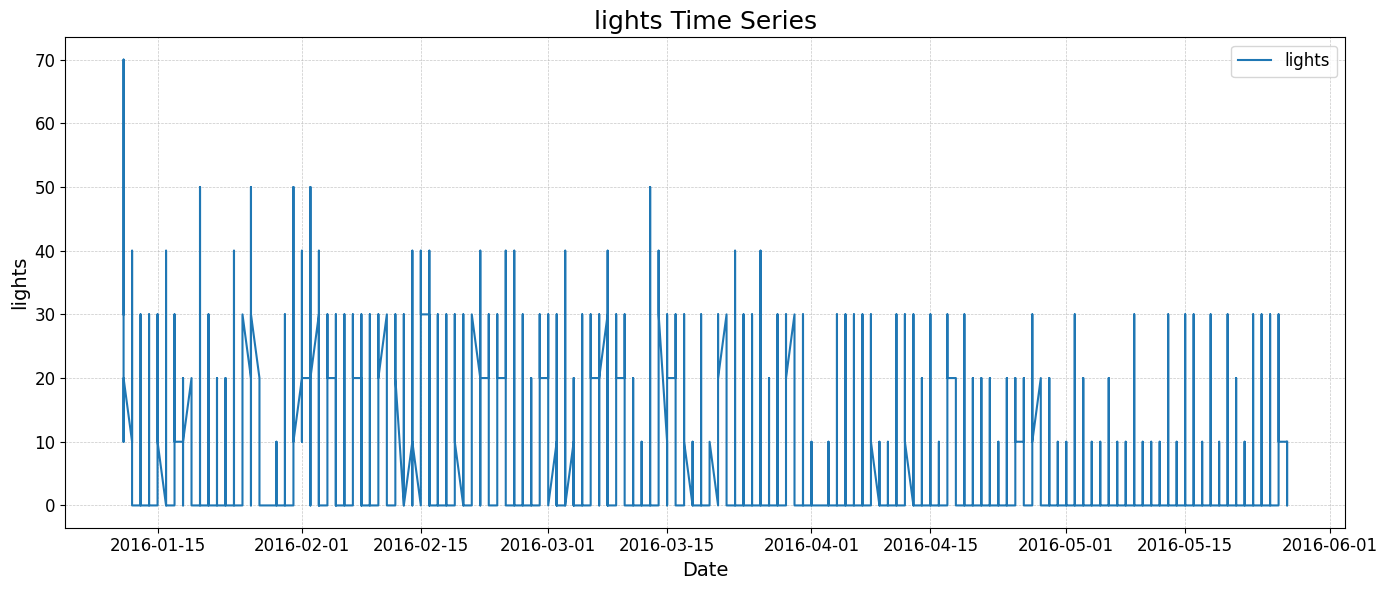

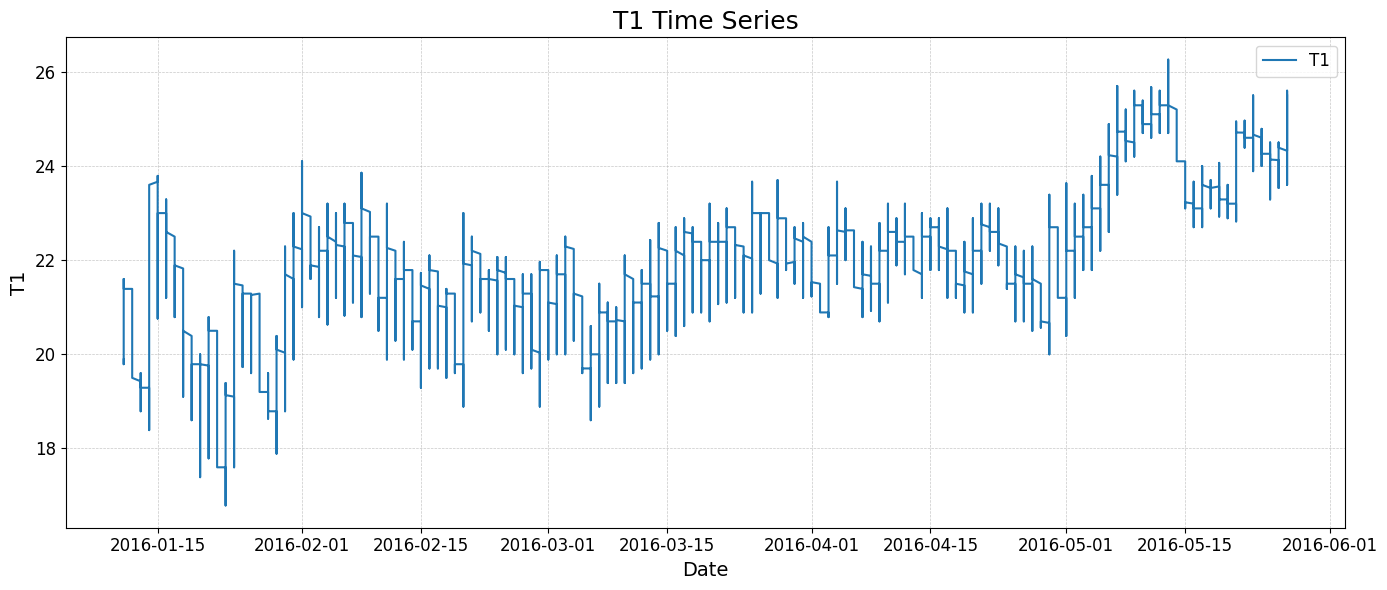

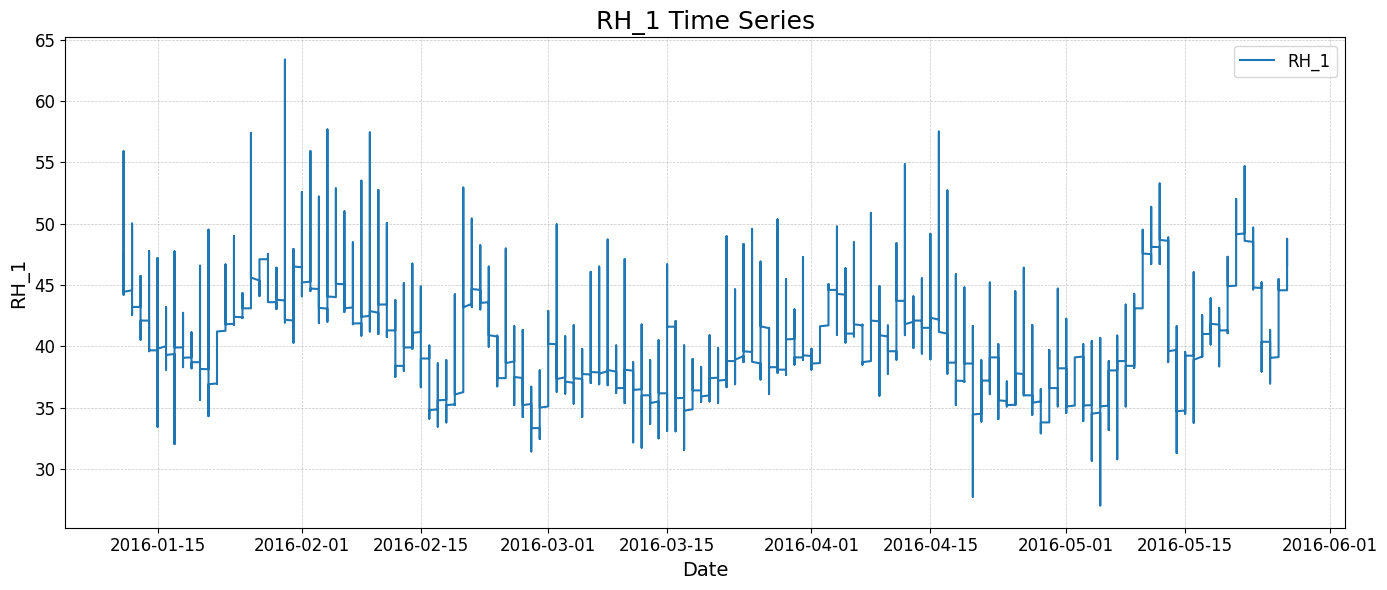

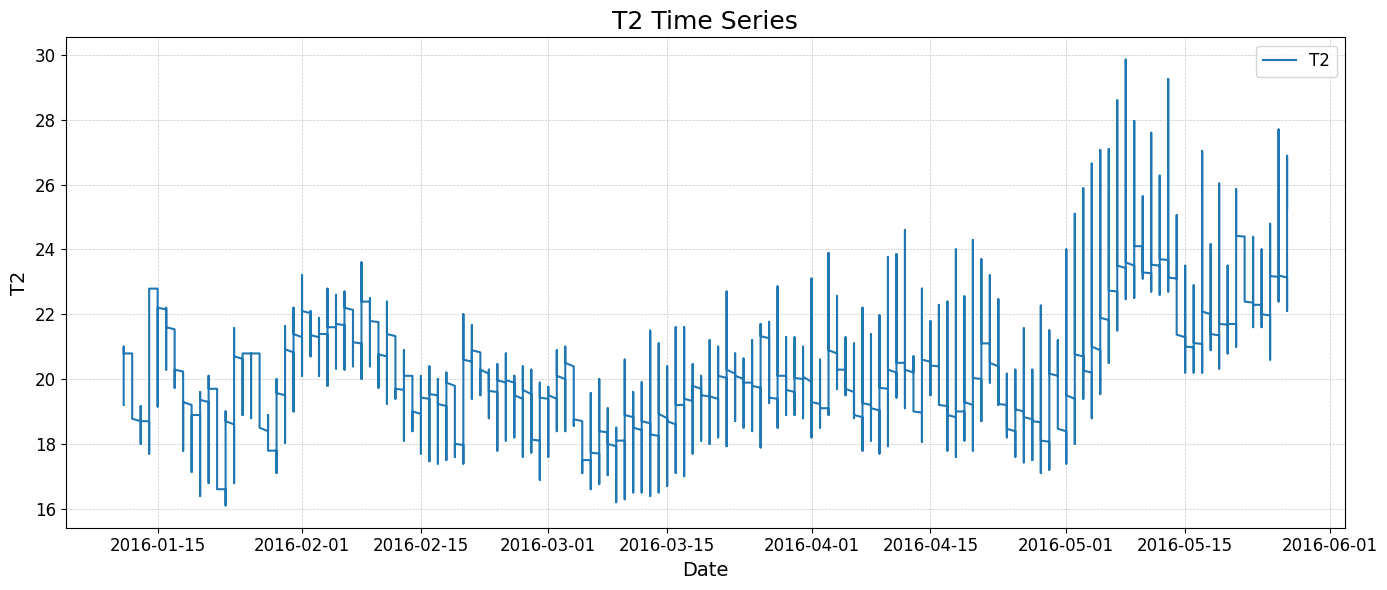

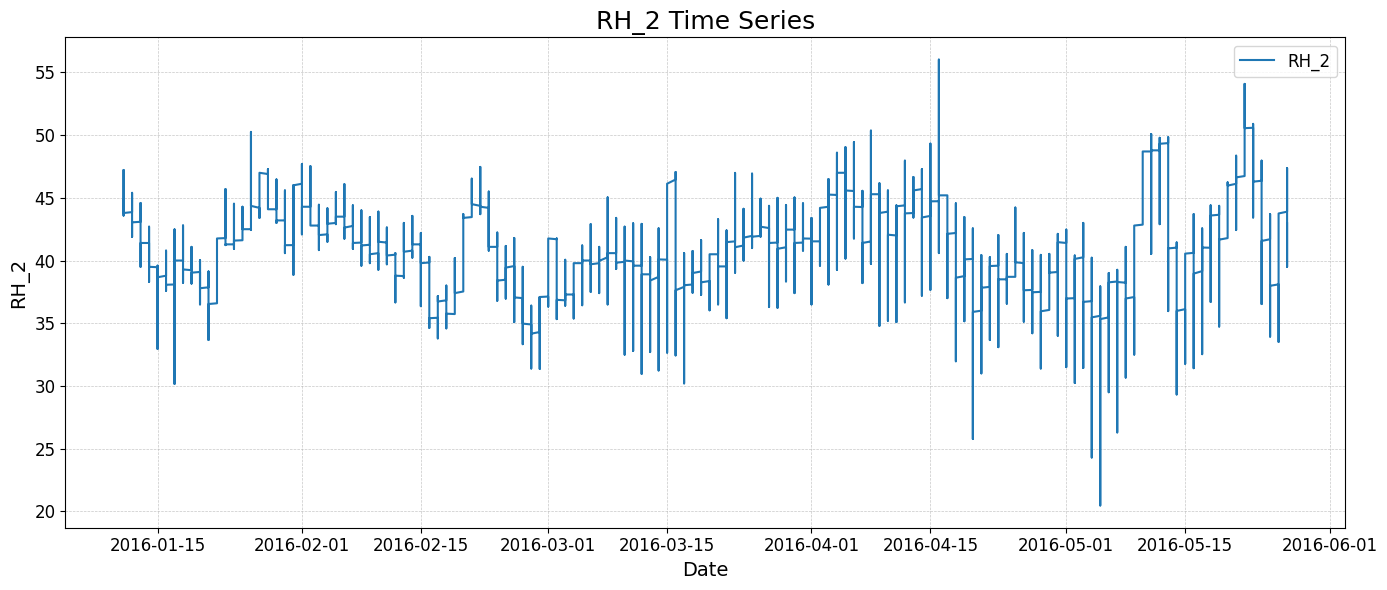

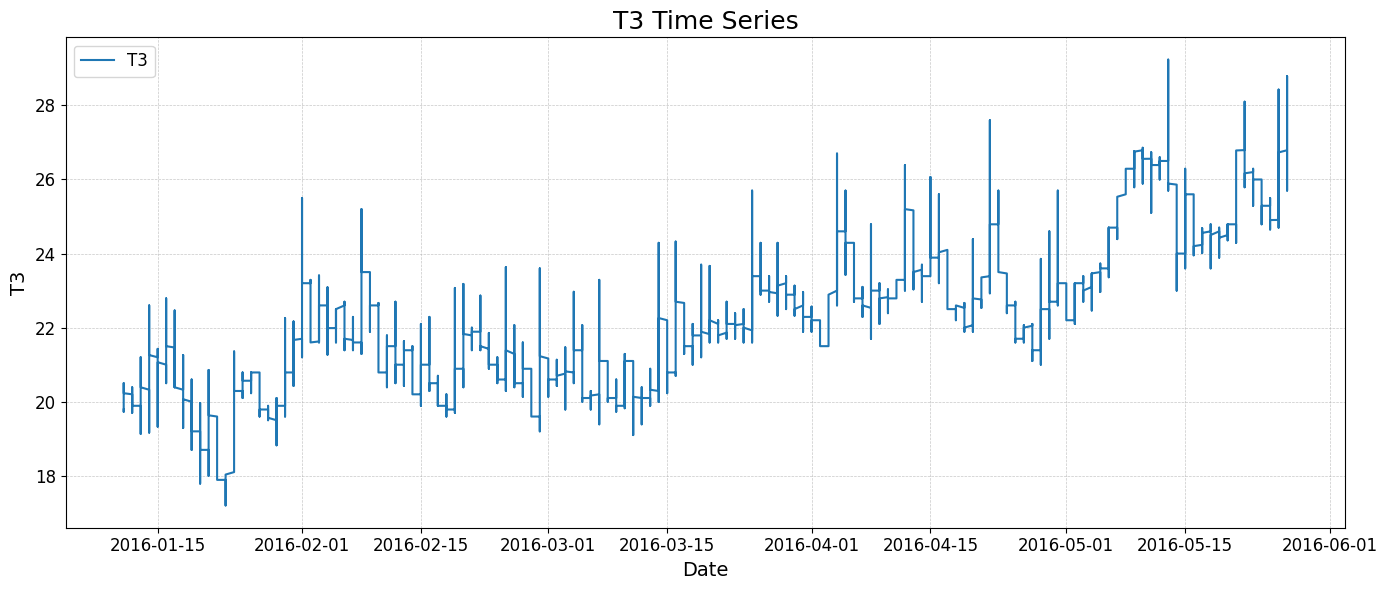

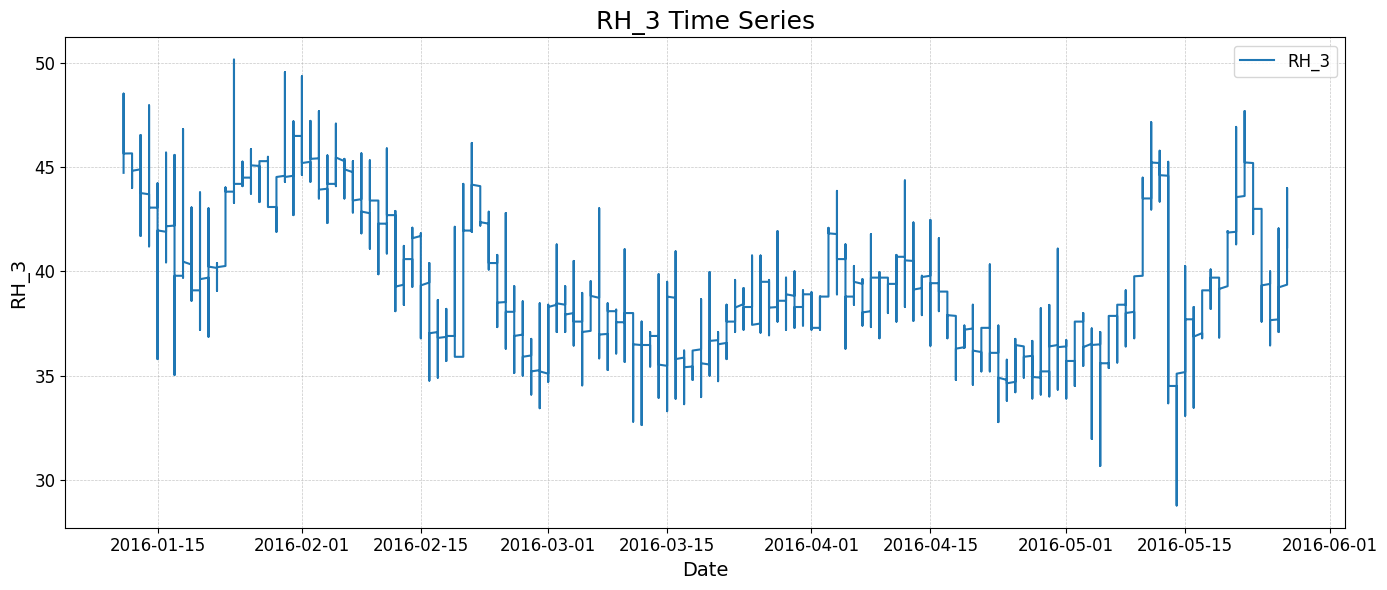

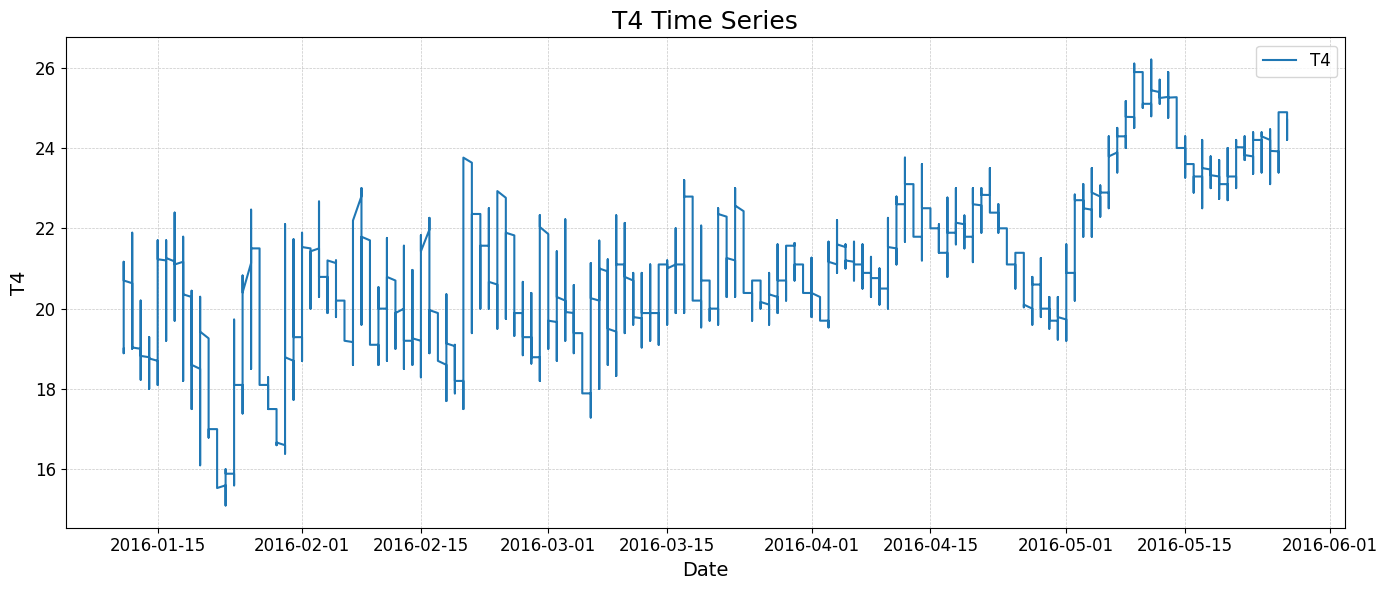

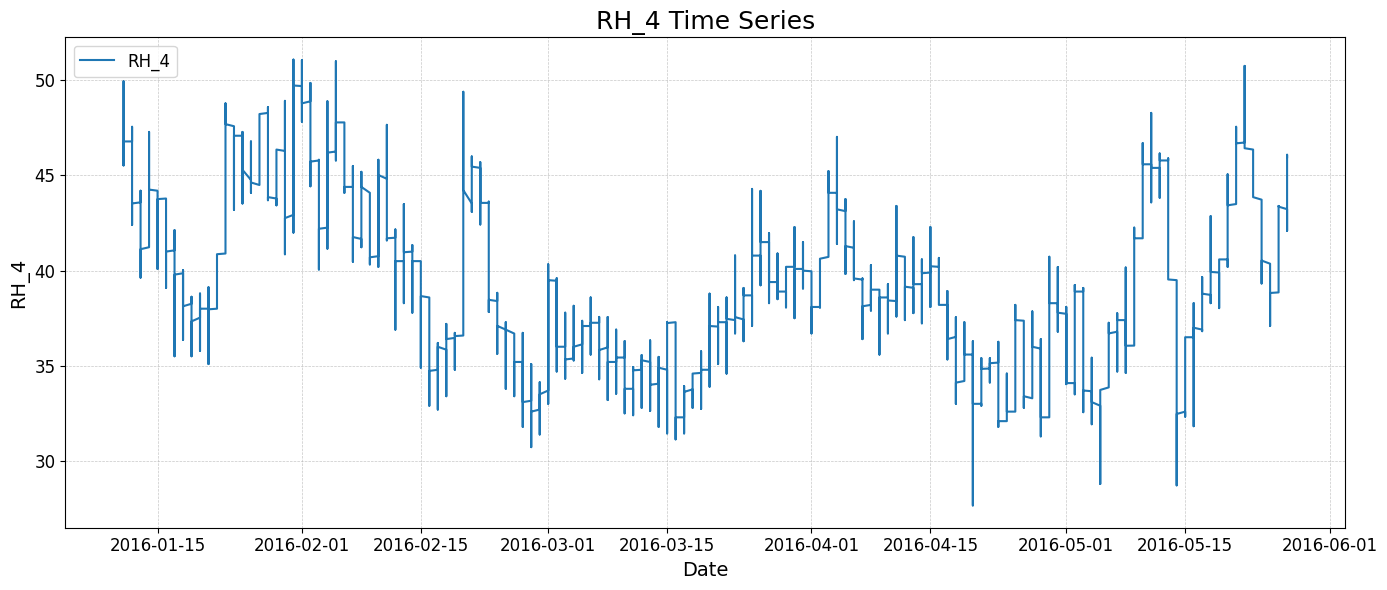

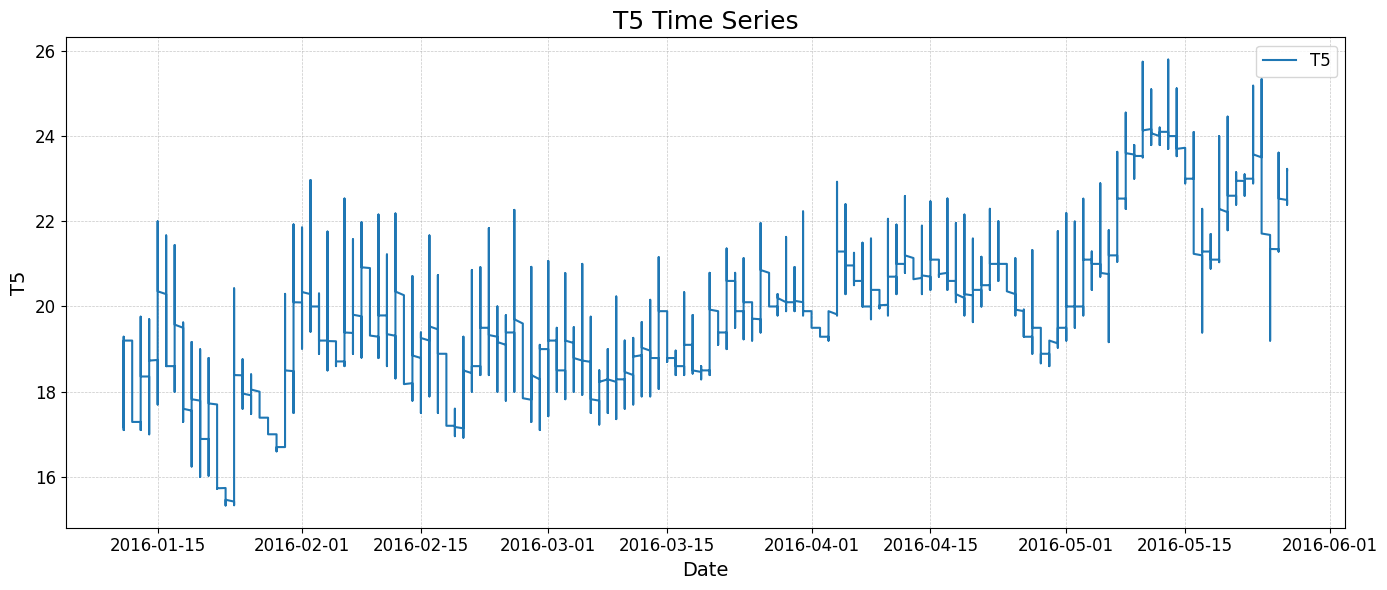

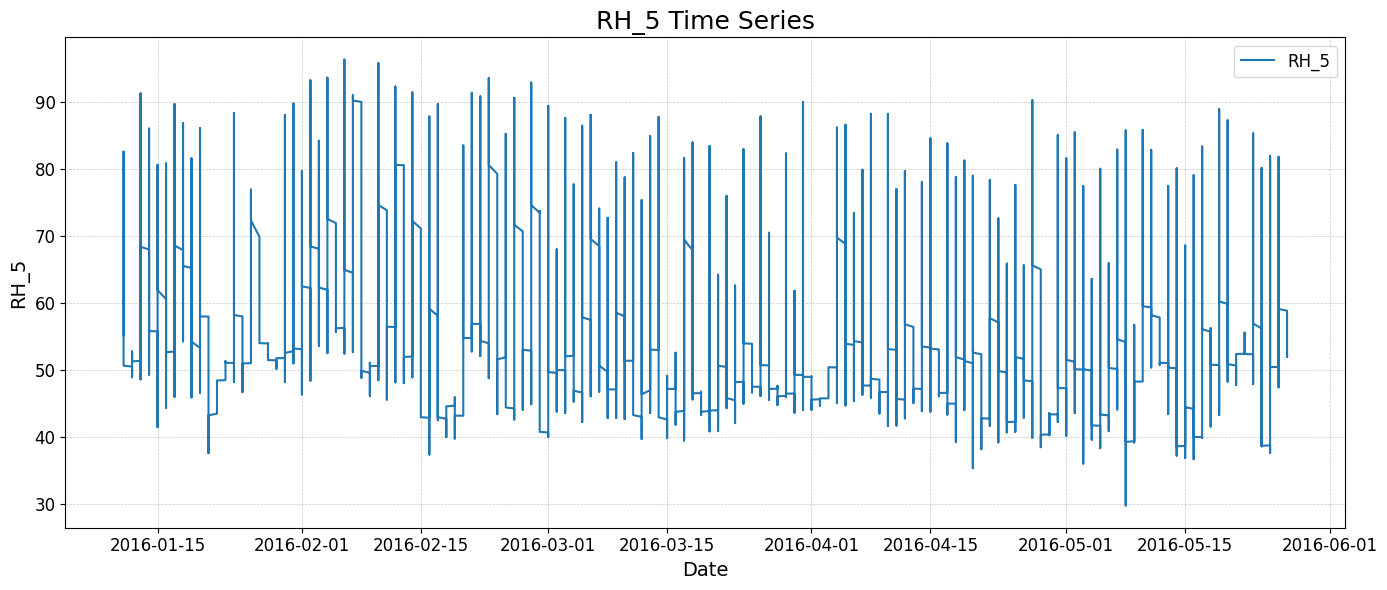

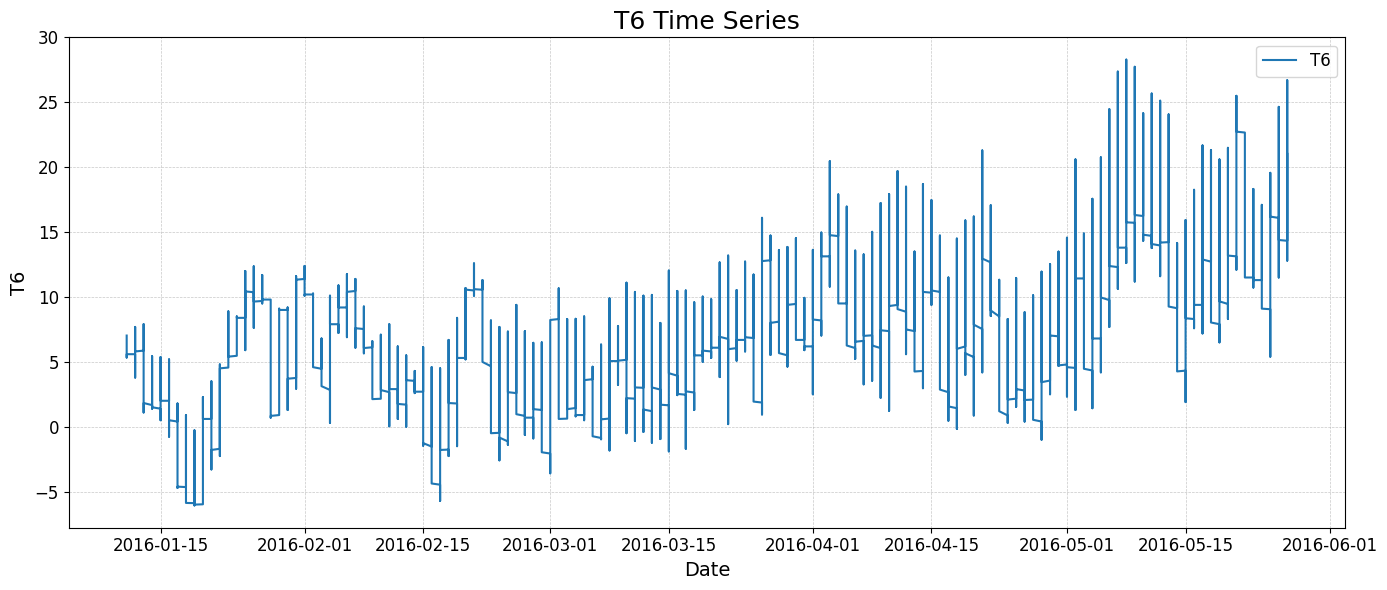

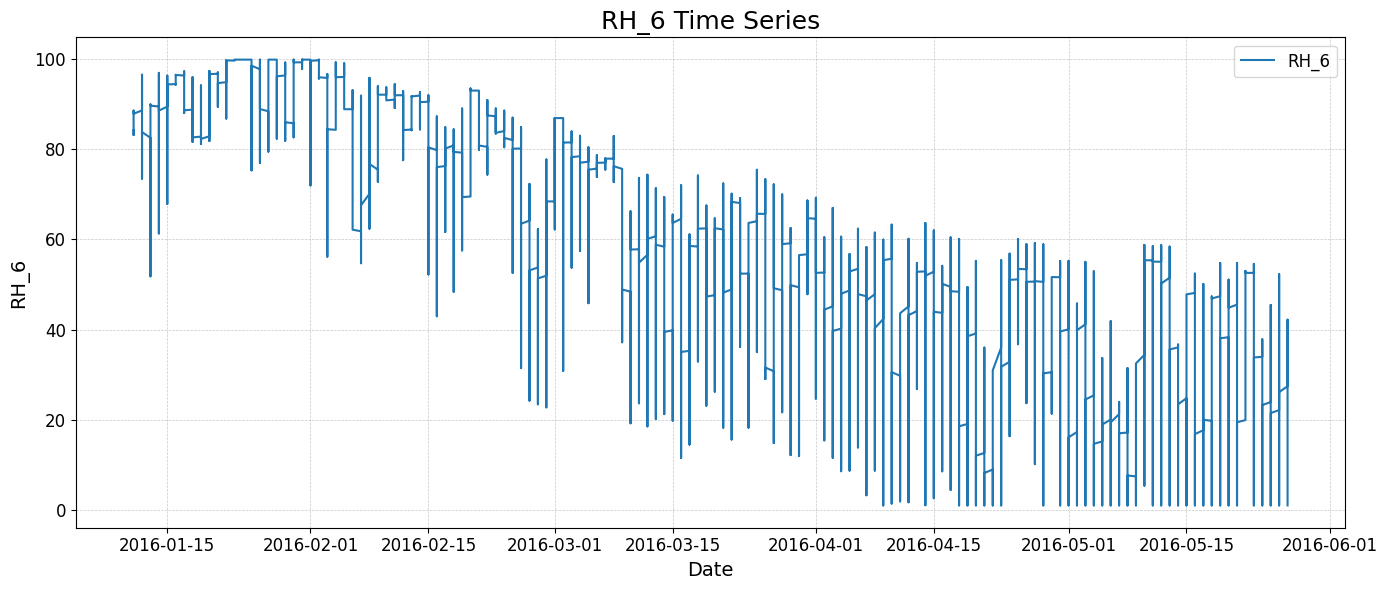

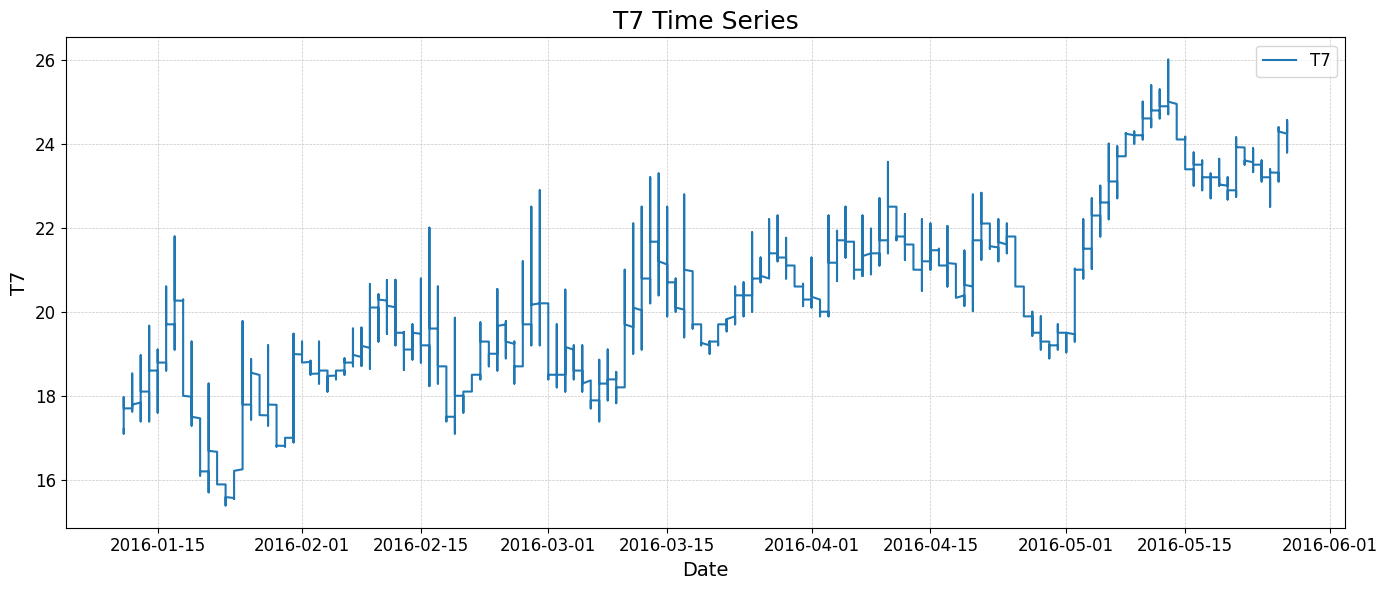

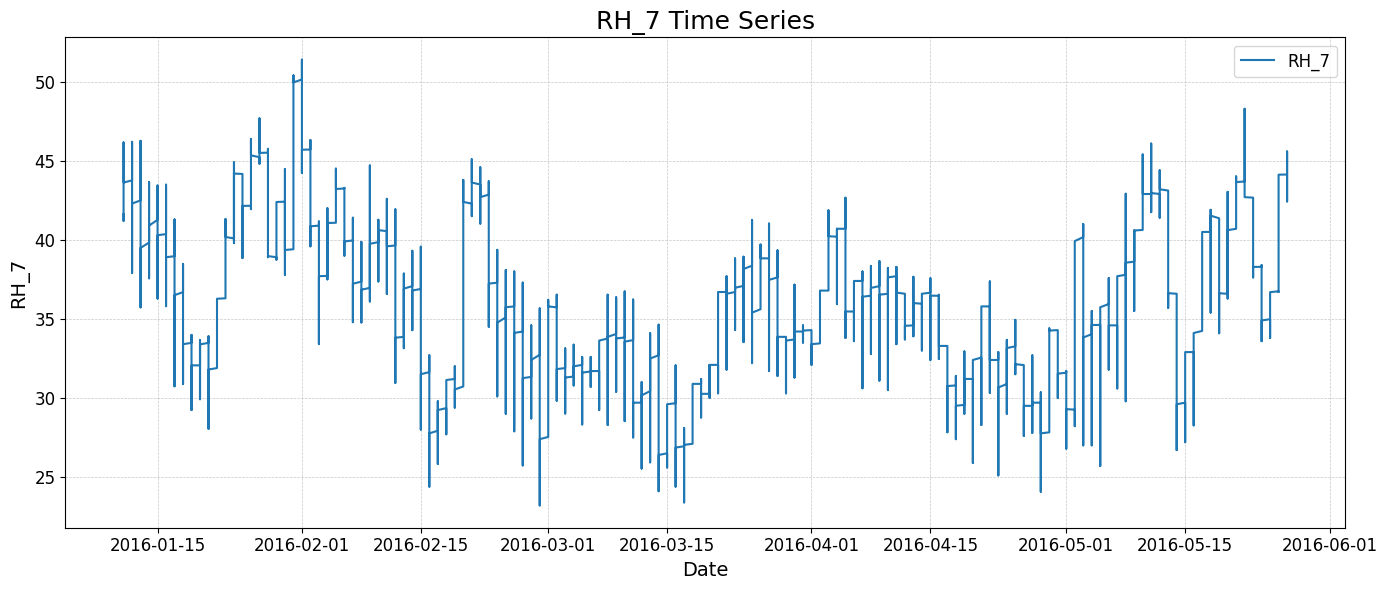

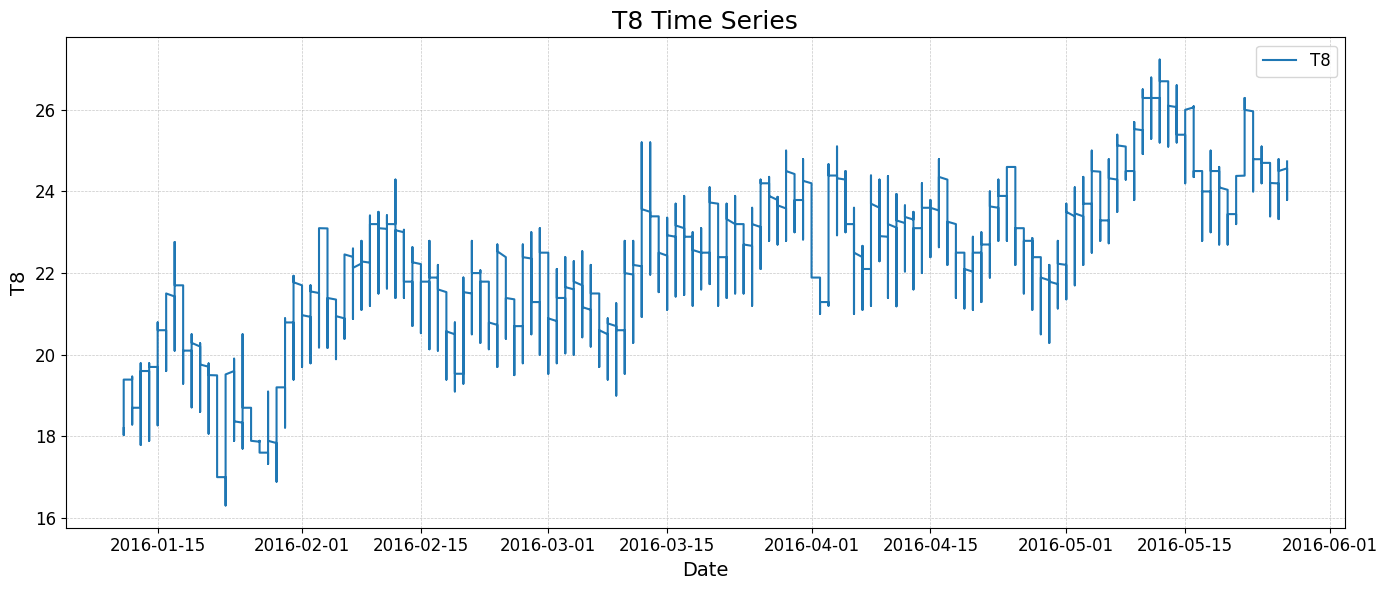

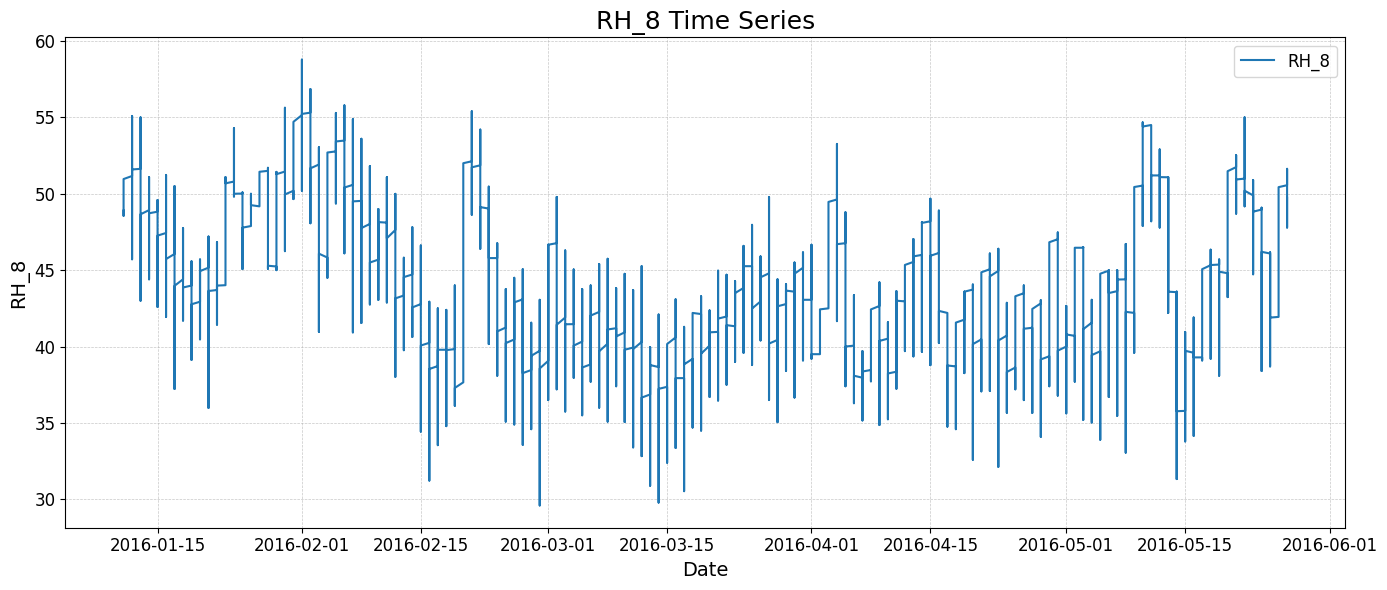

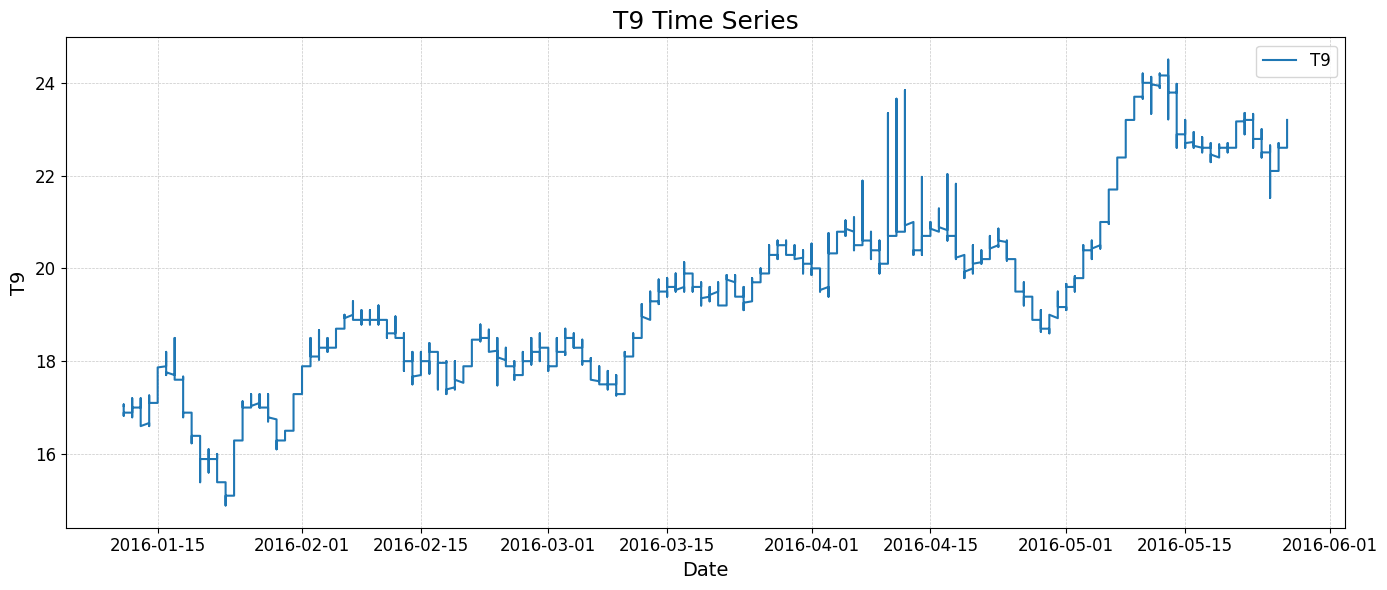

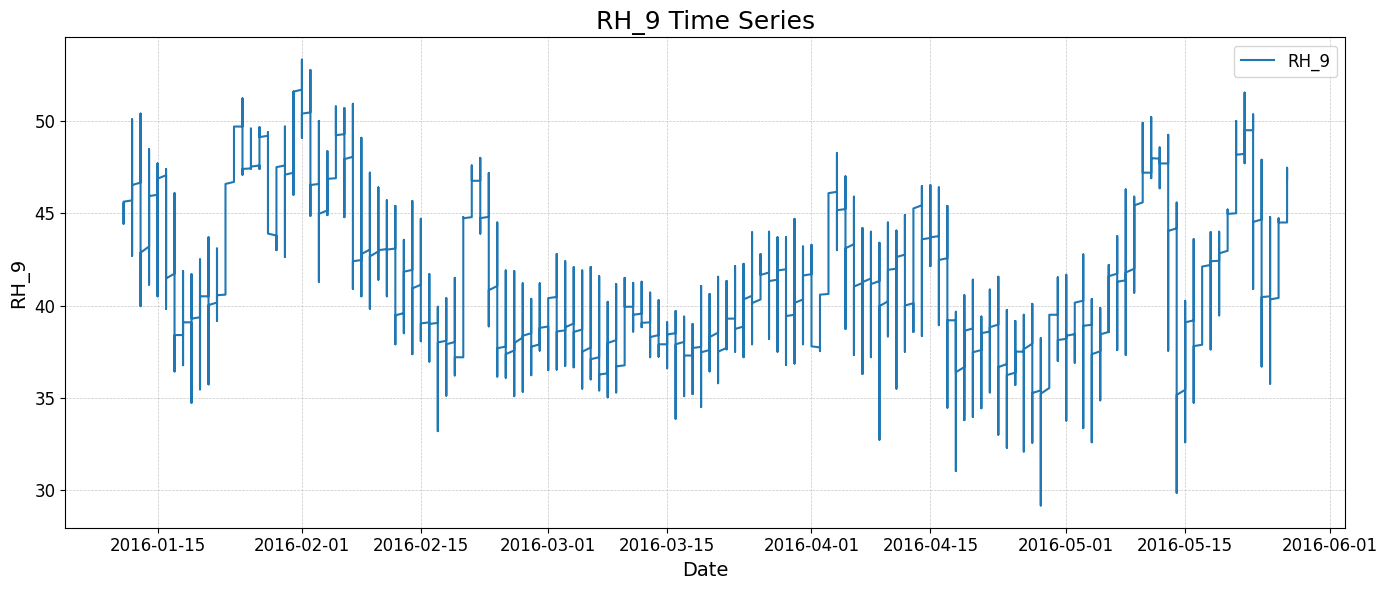

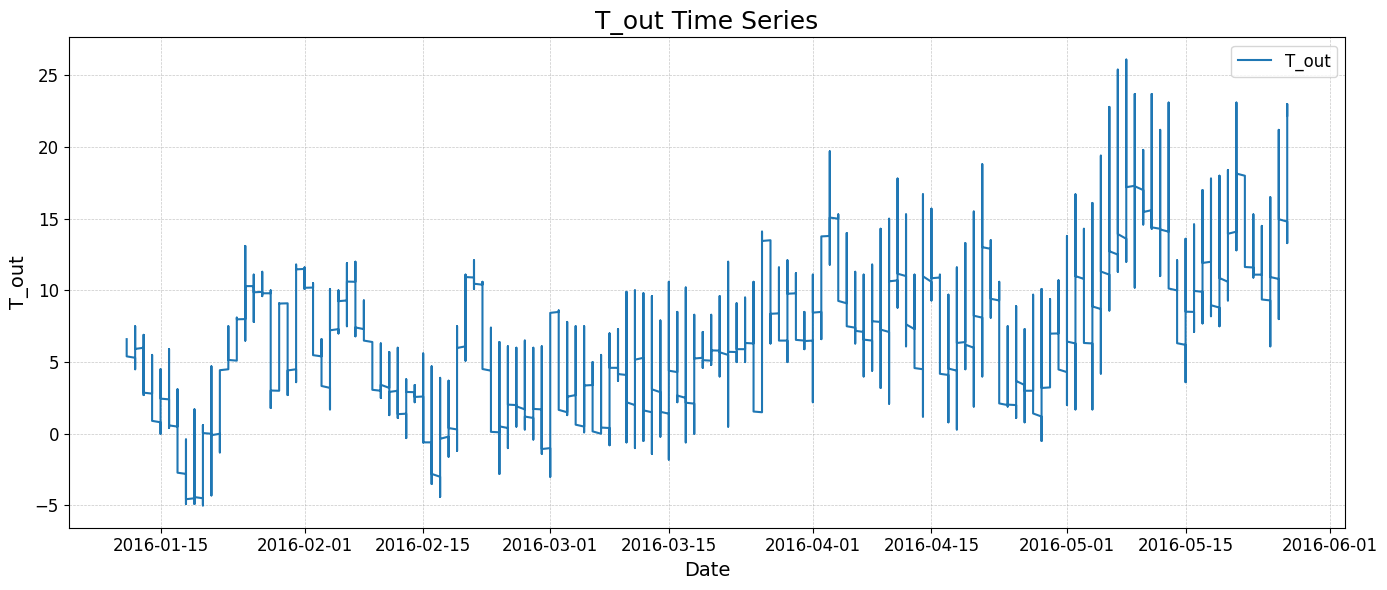

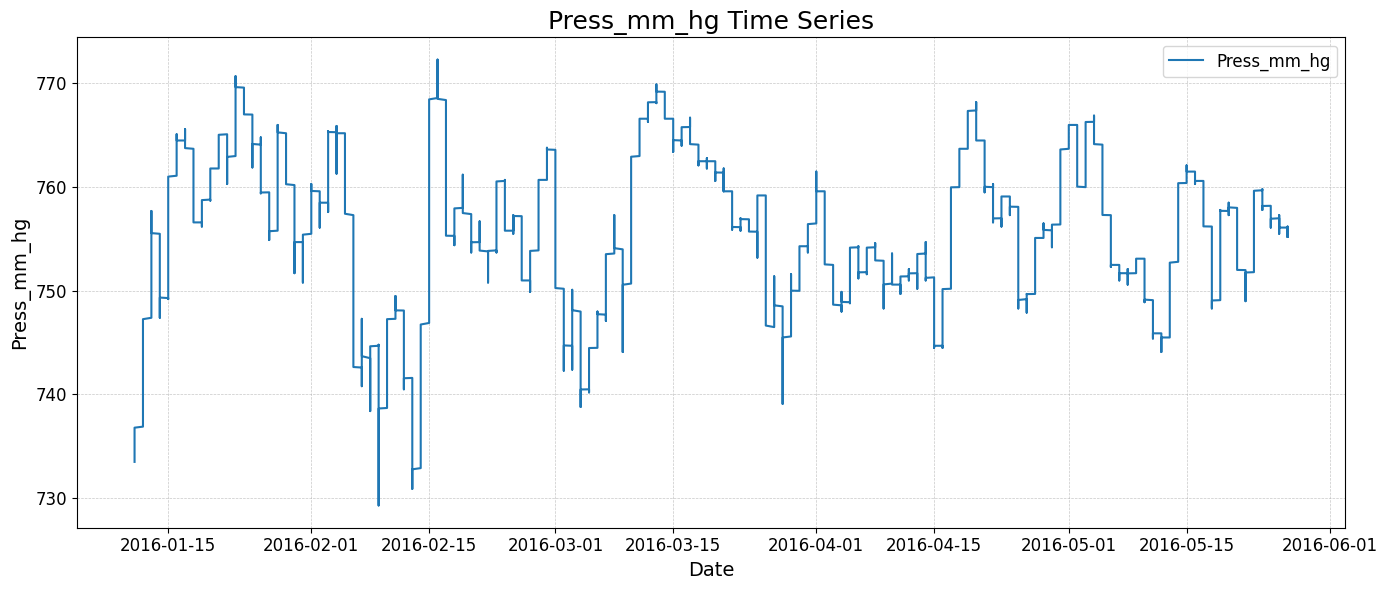

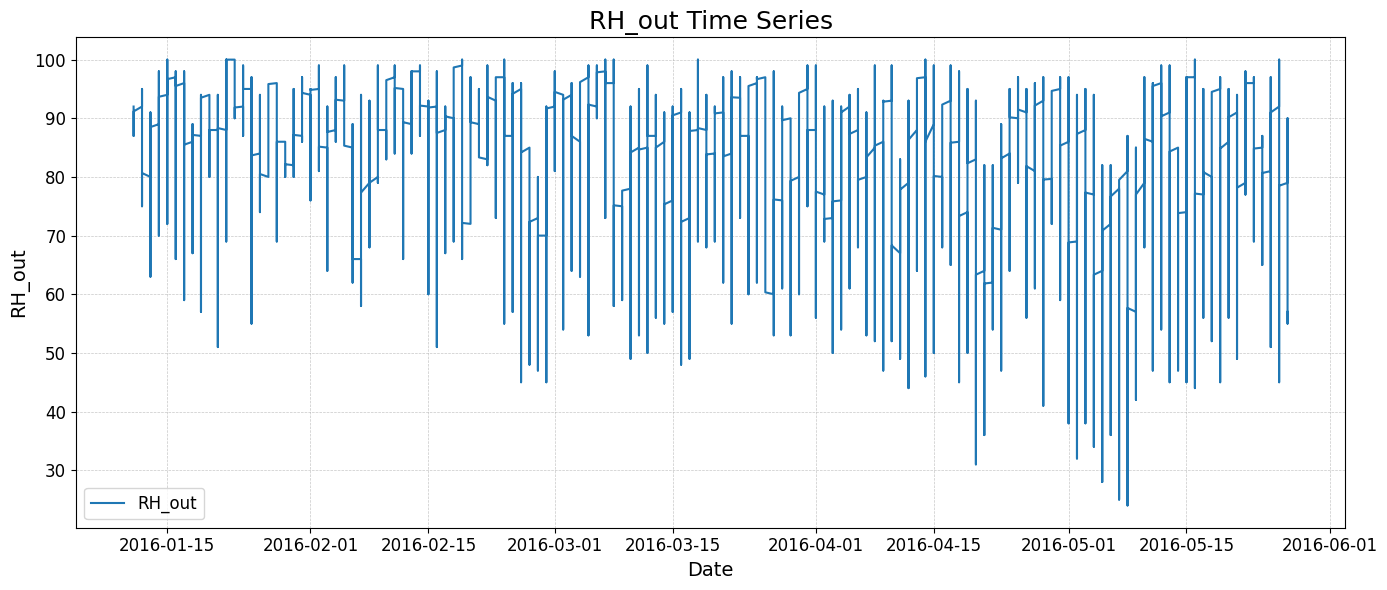

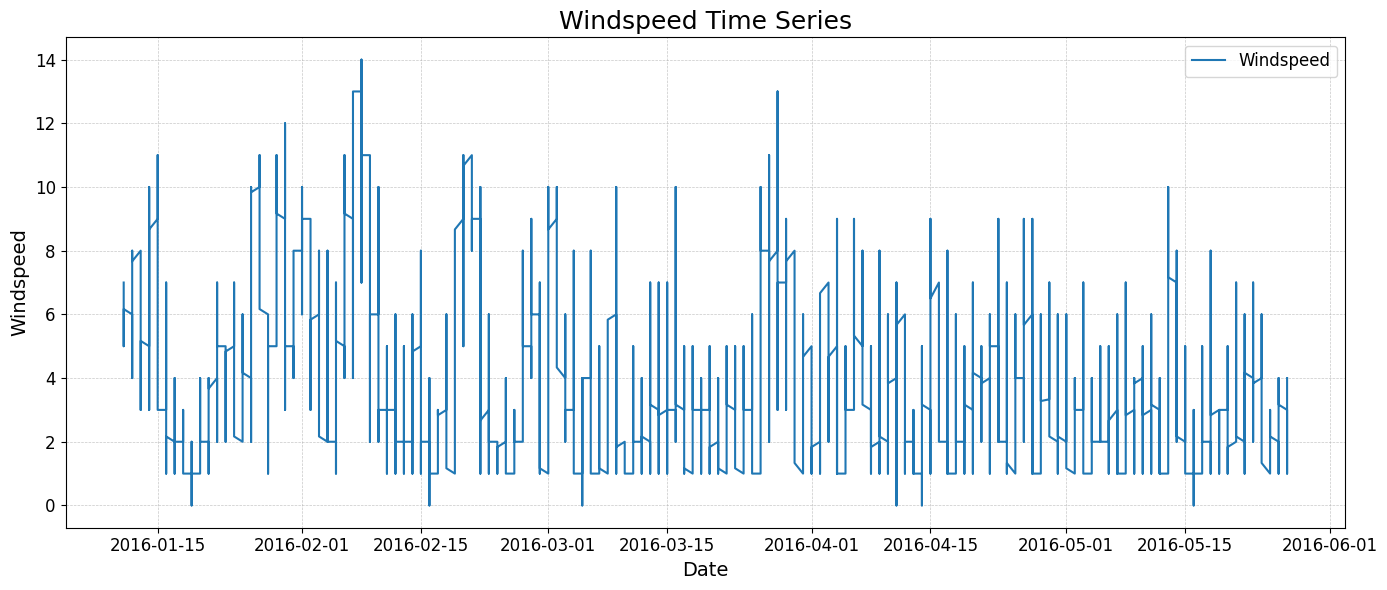

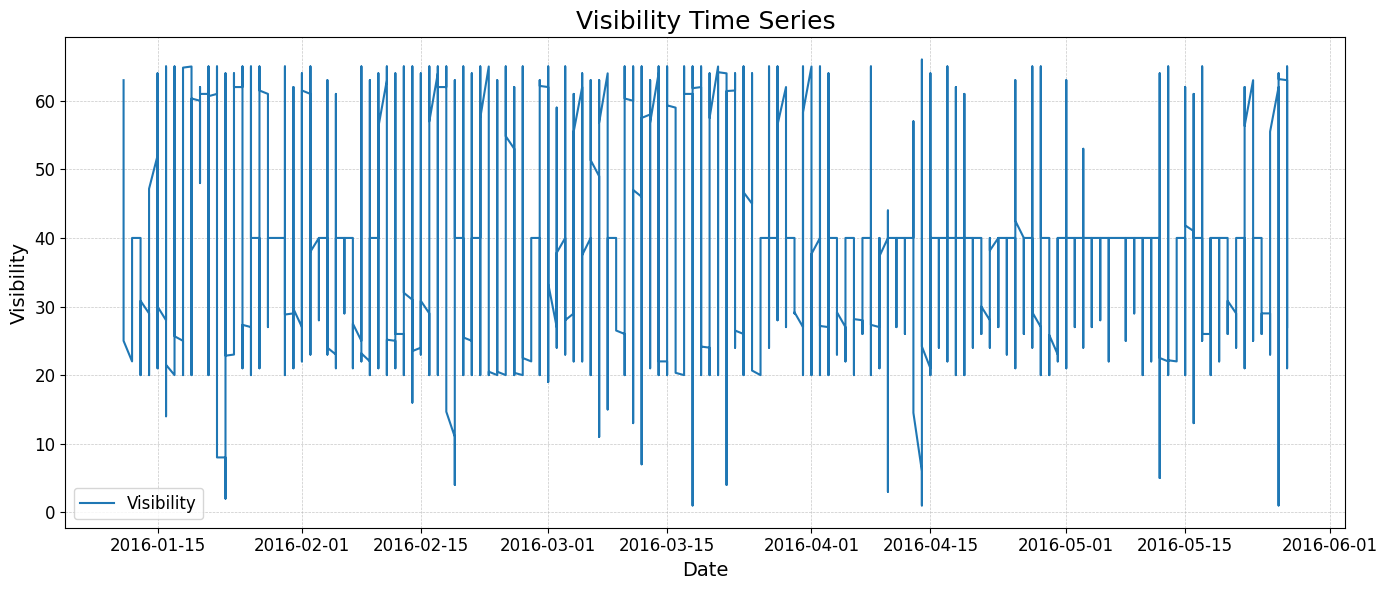

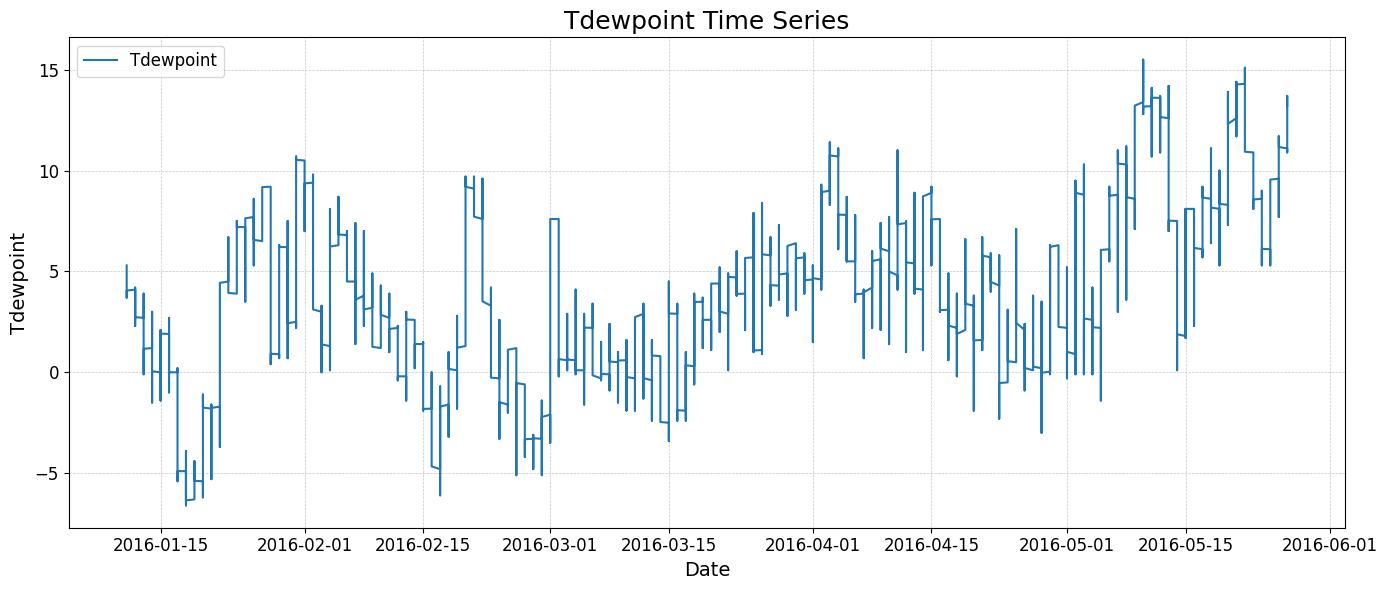

In [30]:
# Set 'Date' as the index
df_energy.set_index('Date', inplace=True)

# Define the plotting function
def plot_series(col_name):
    plt.figure(figsize=(14, 6))
    plt.plot(df_energy.index, df_energy[col_name], linewidth=1.5, label=col_name)
    plt.title(f'{col_name} Time Series', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(col_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.close()  # Free memory

# List of columns to plot (excluding 'Date', 'Appliances', 'rv1', 'rv2')
columns_to_plot = [
    'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
    'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
    'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg',
    'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'
]

# Loop through and plot each
for col in columns_to_plot:
    plot_series(col)


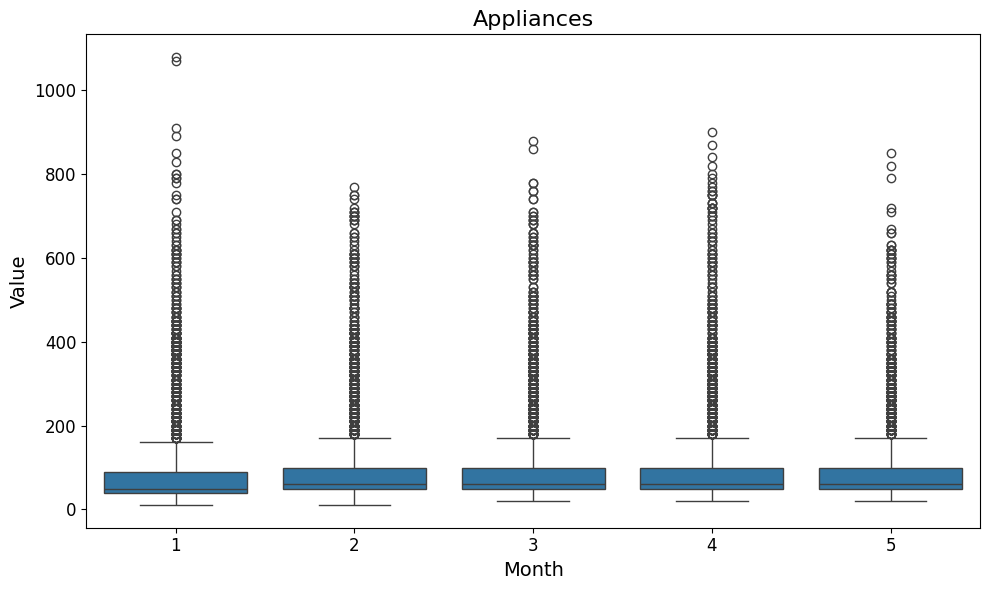

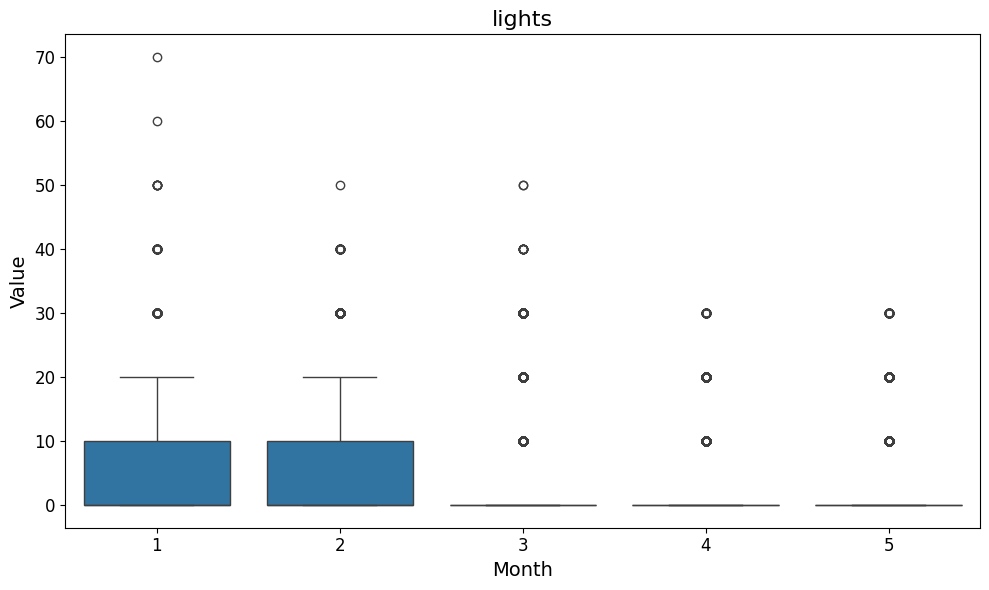

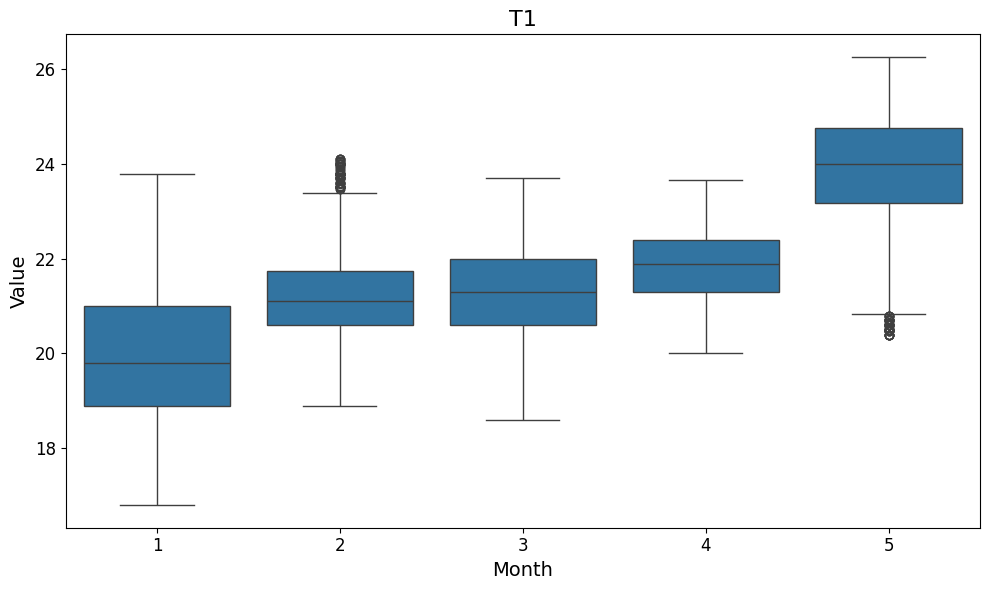

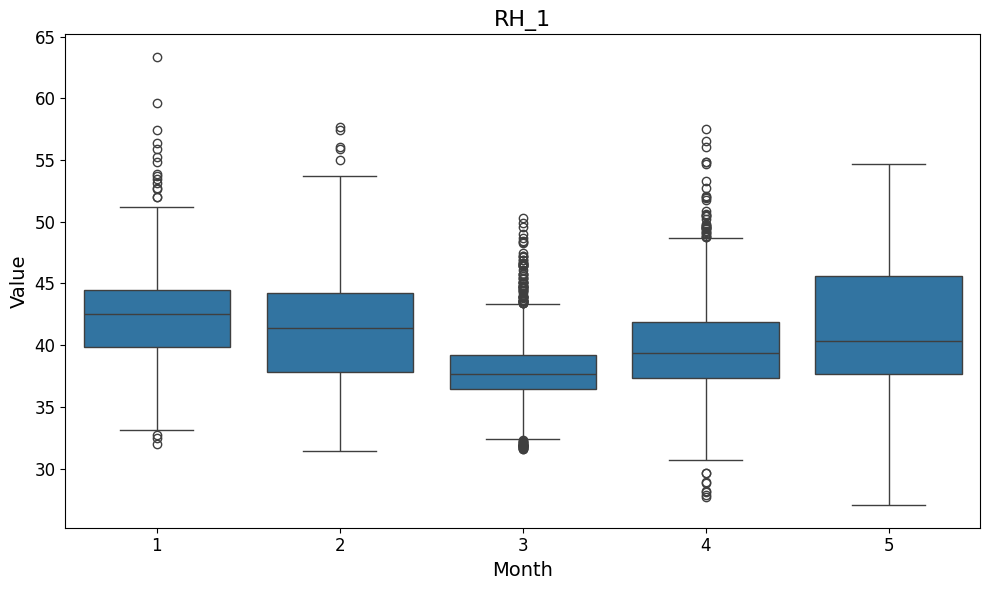

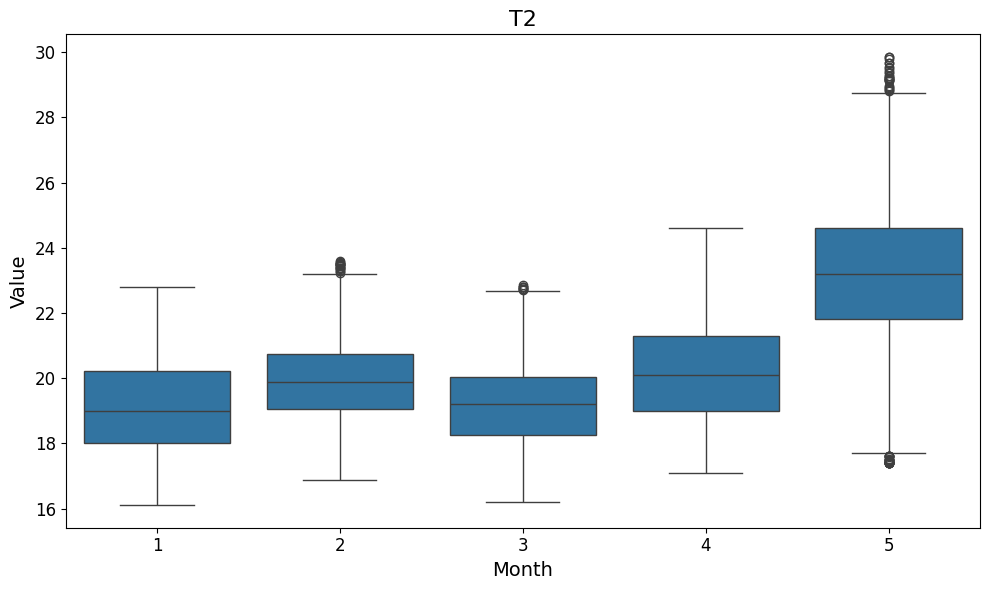

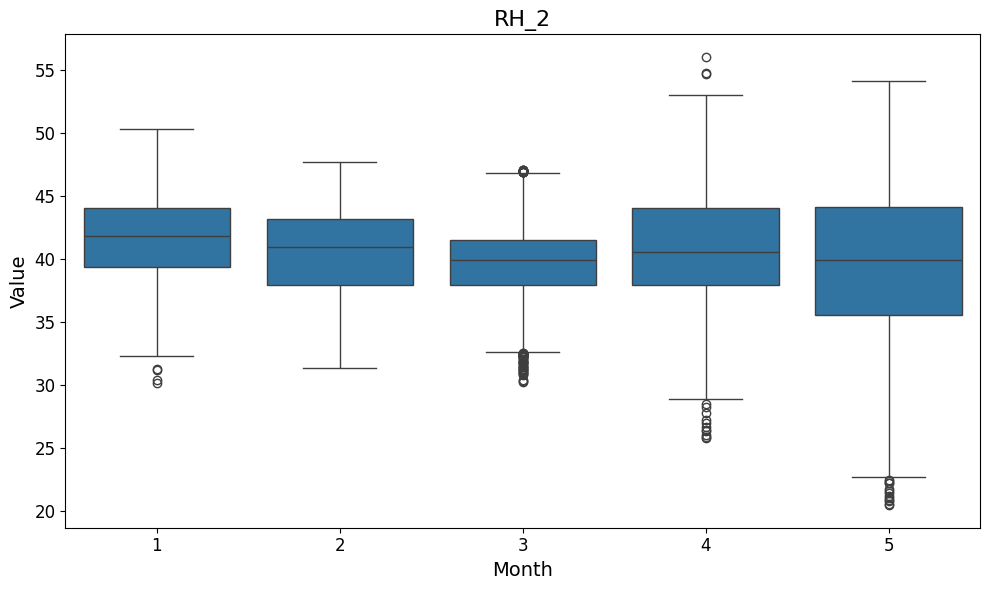

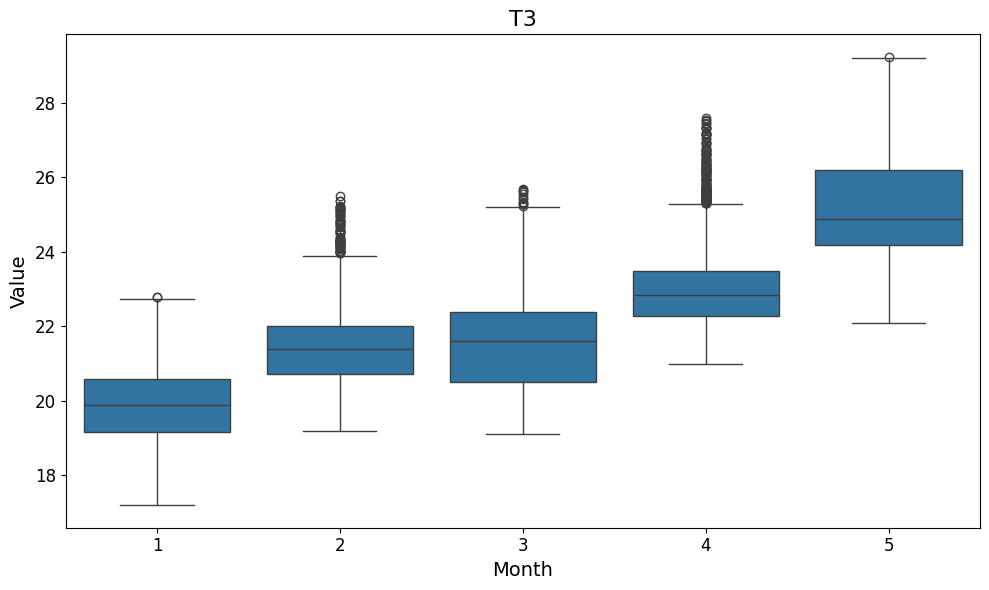

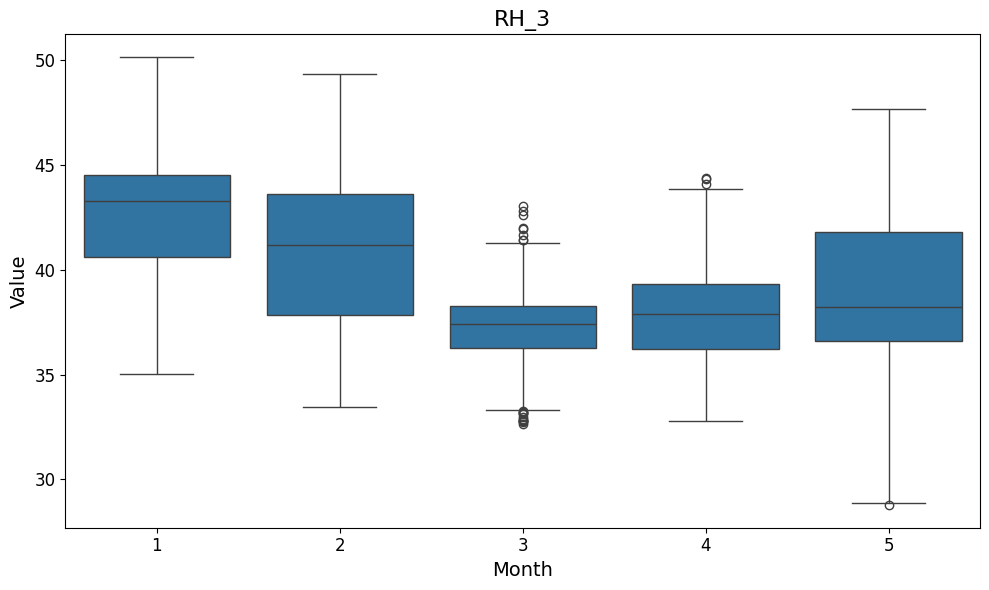

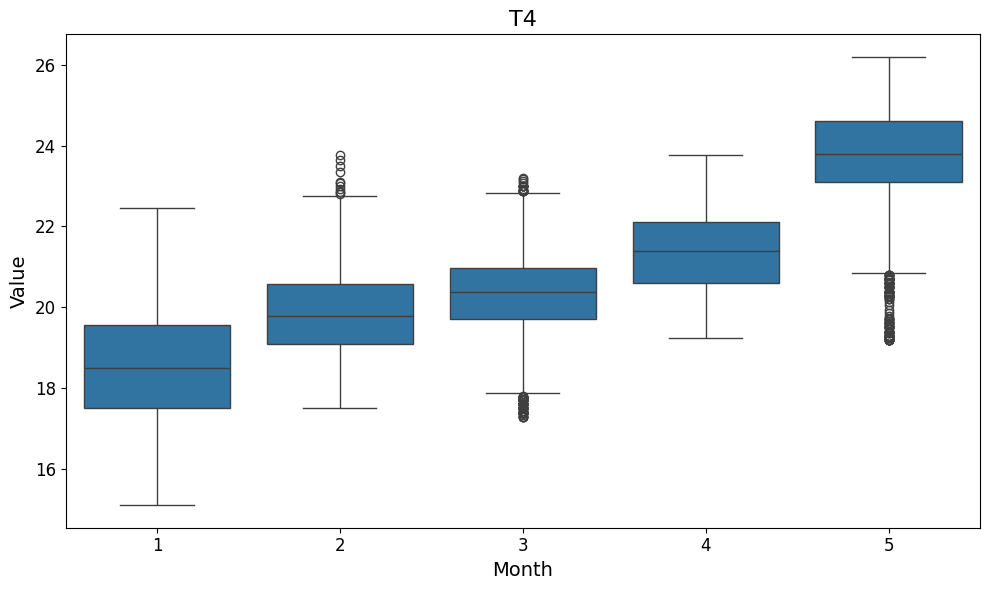

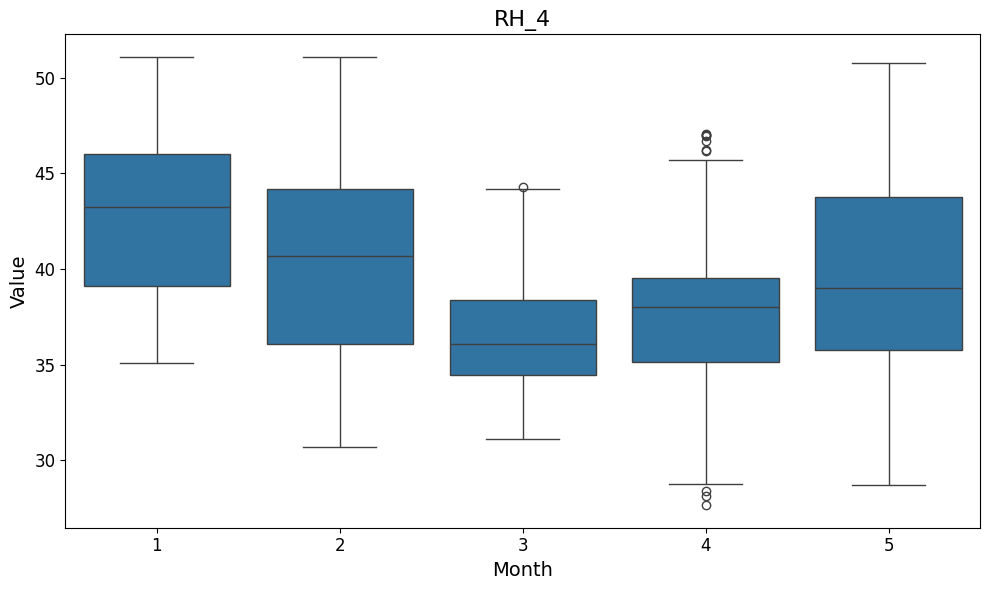

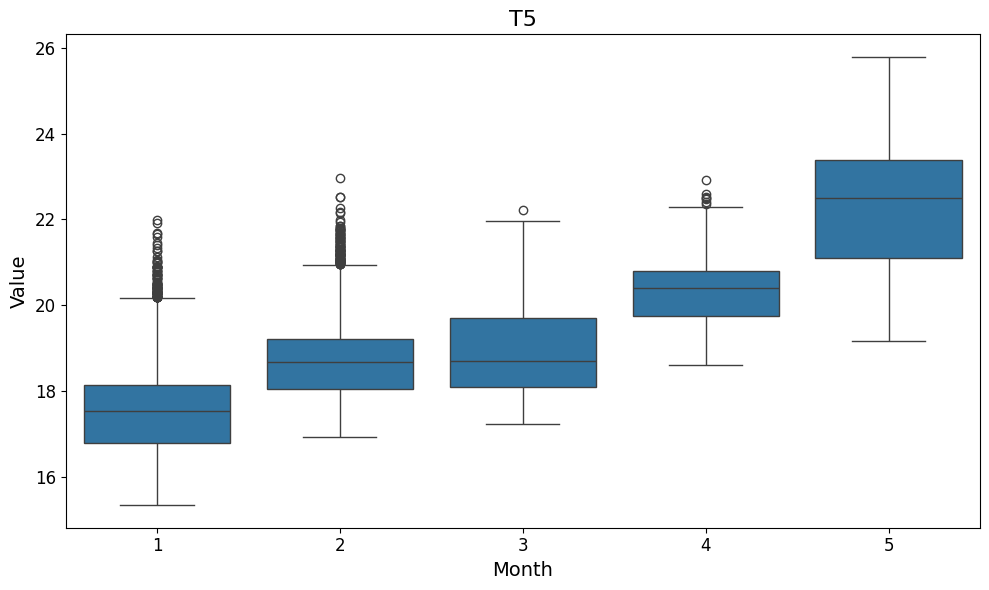

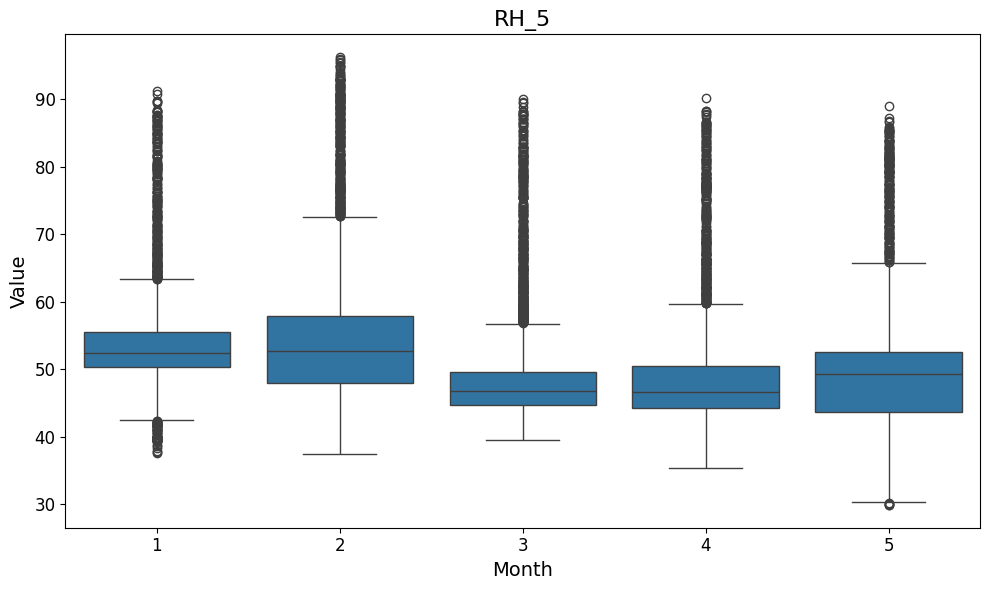

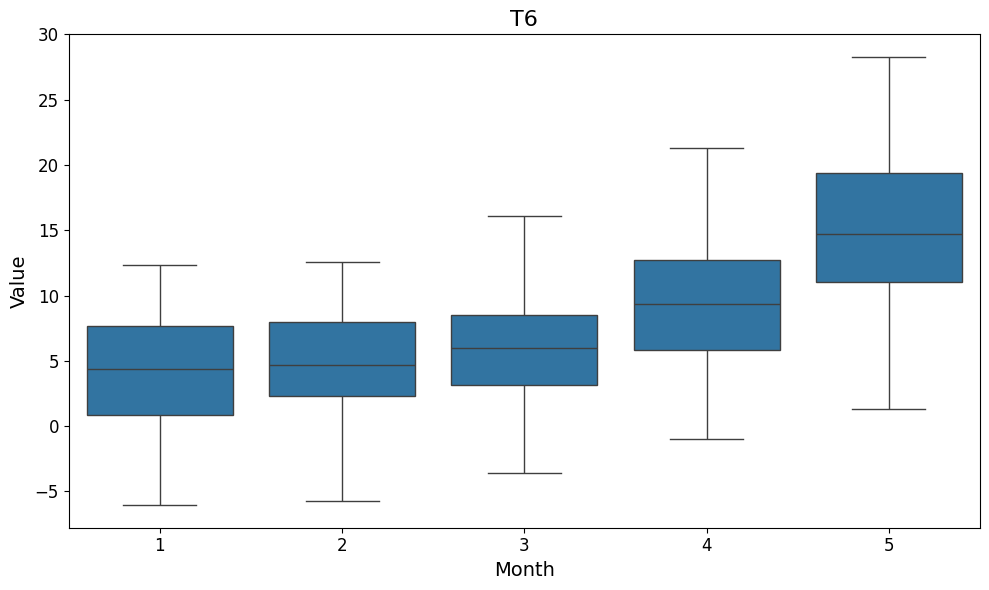

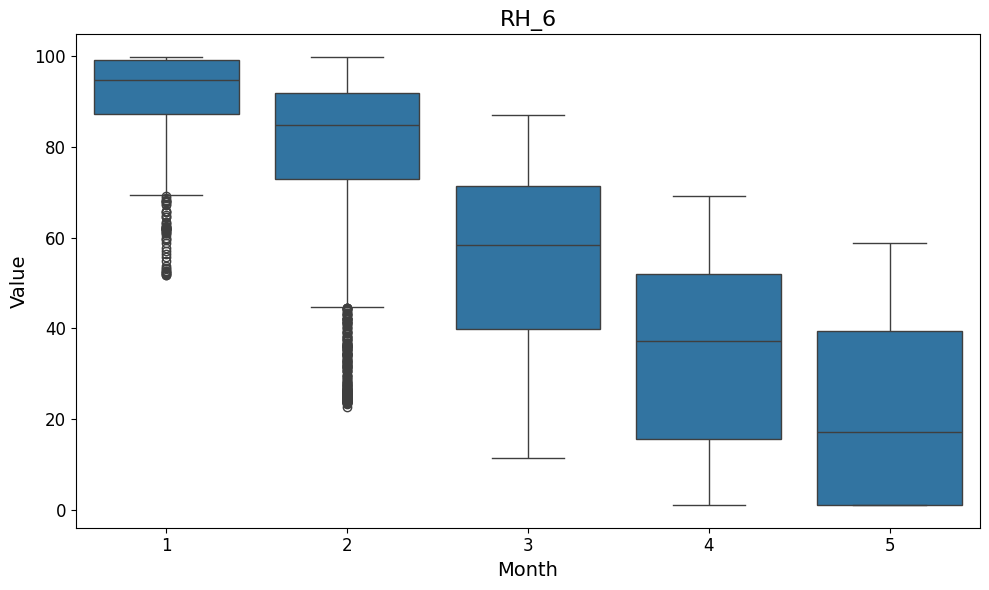

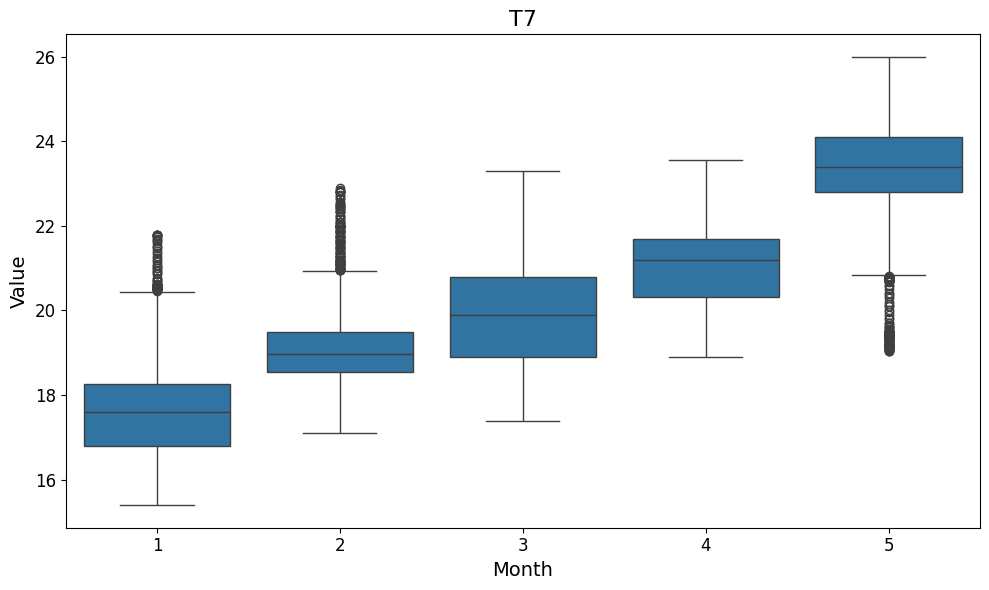

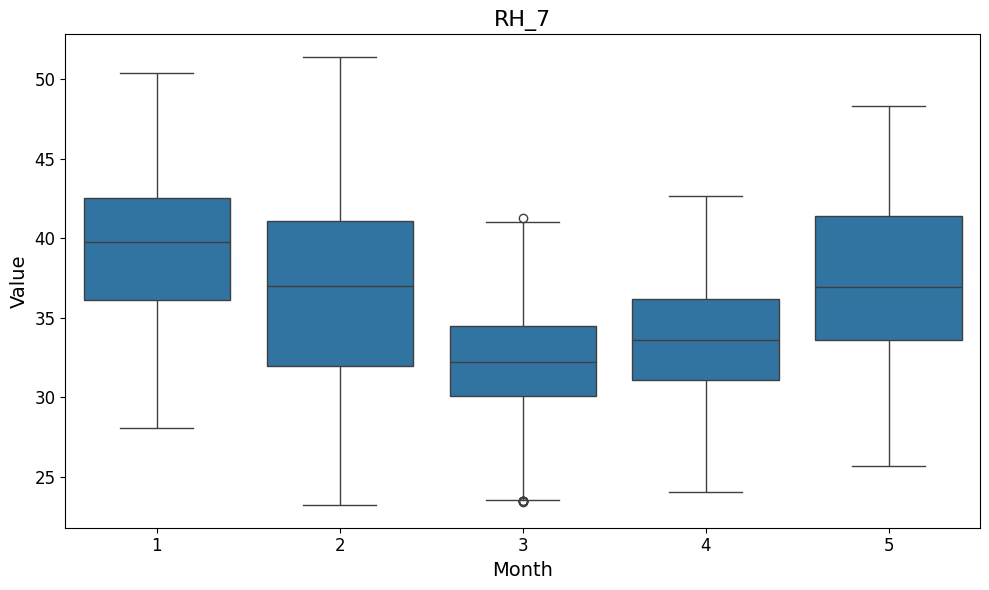

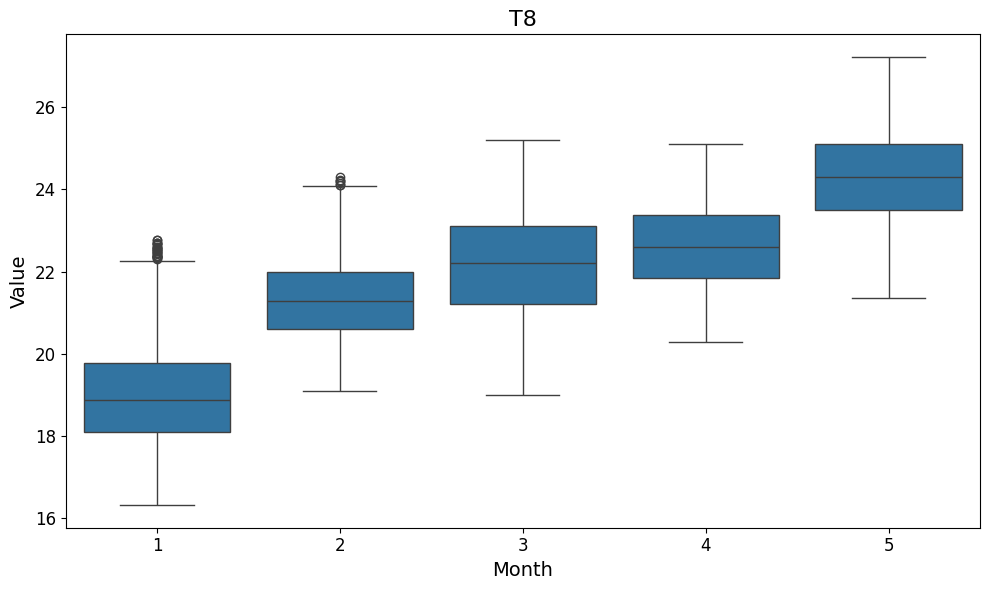

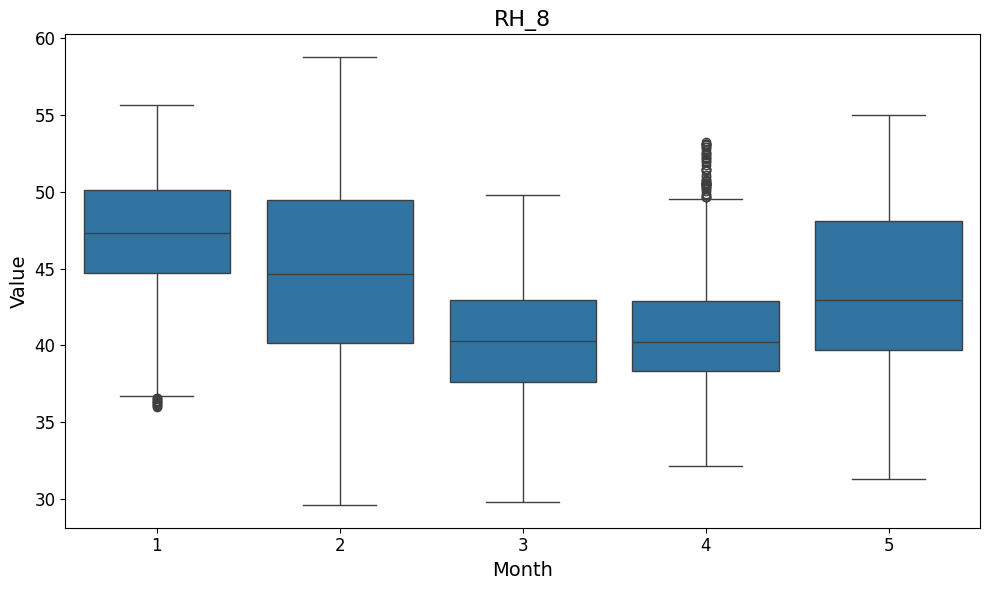

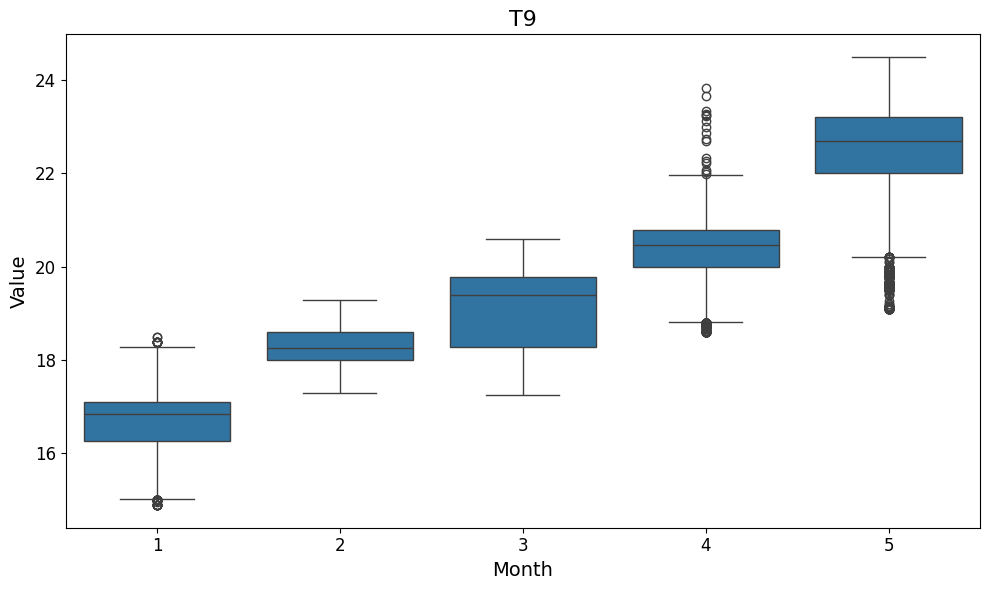

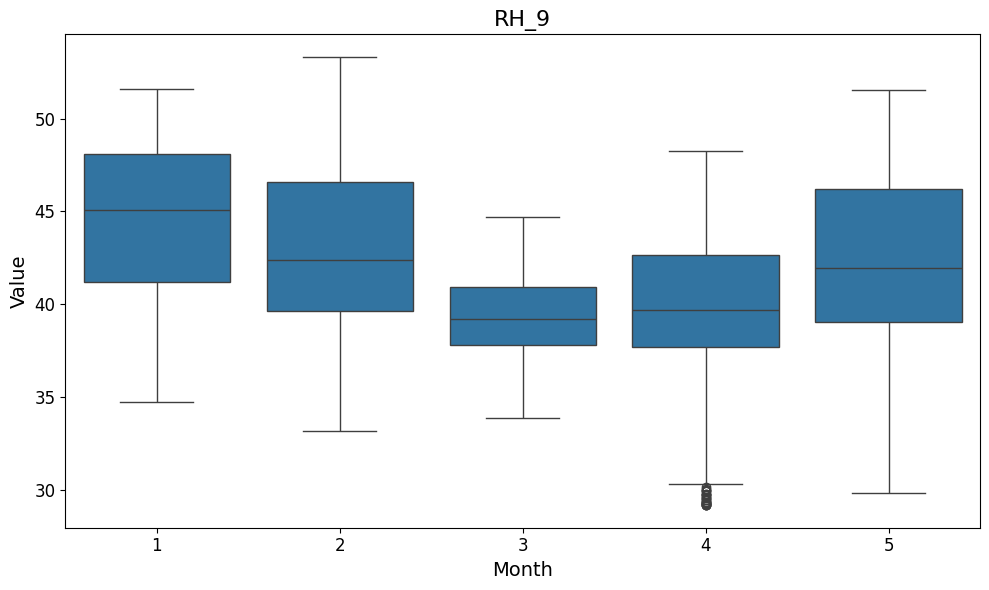

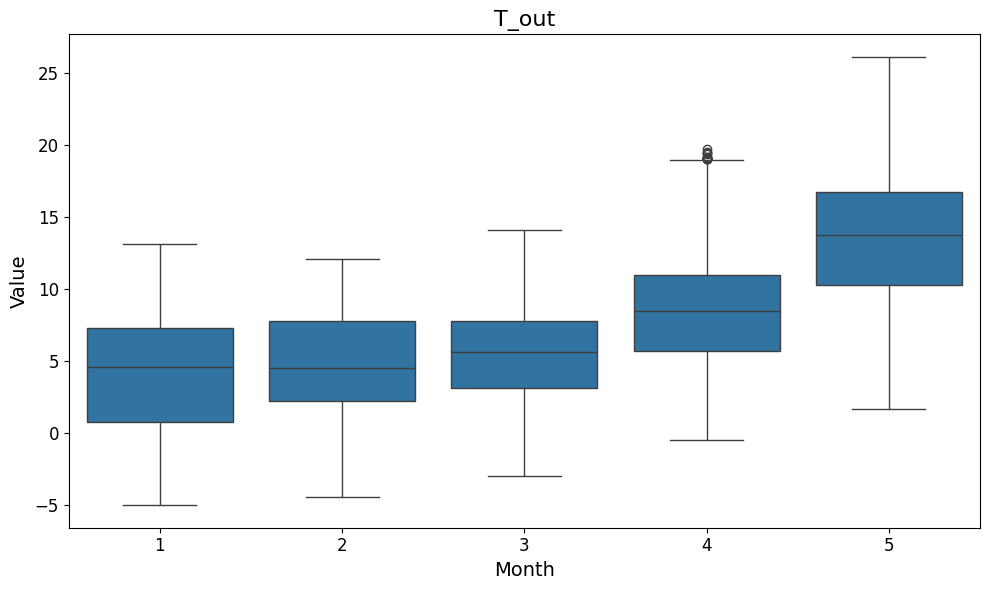

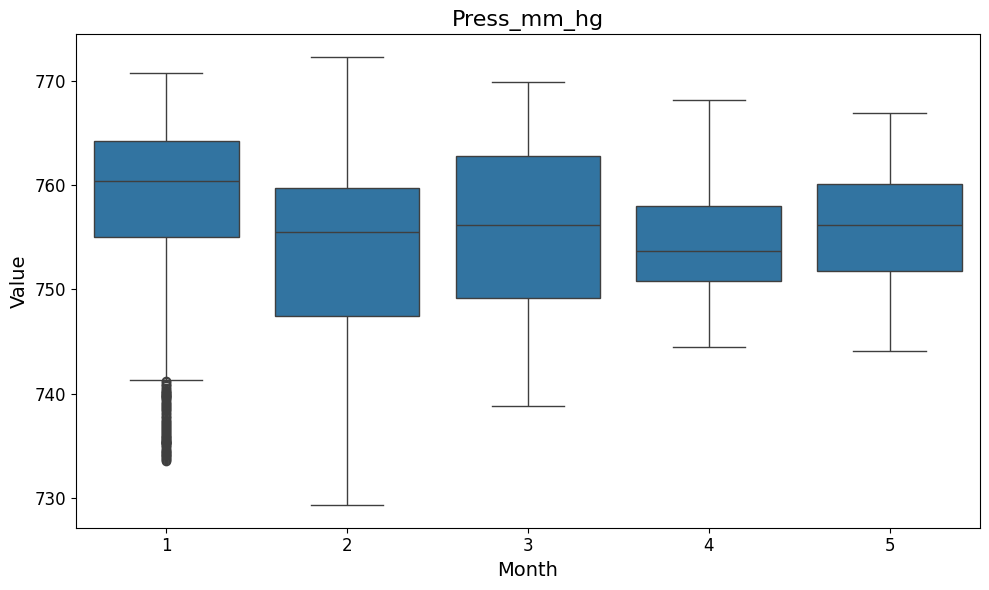

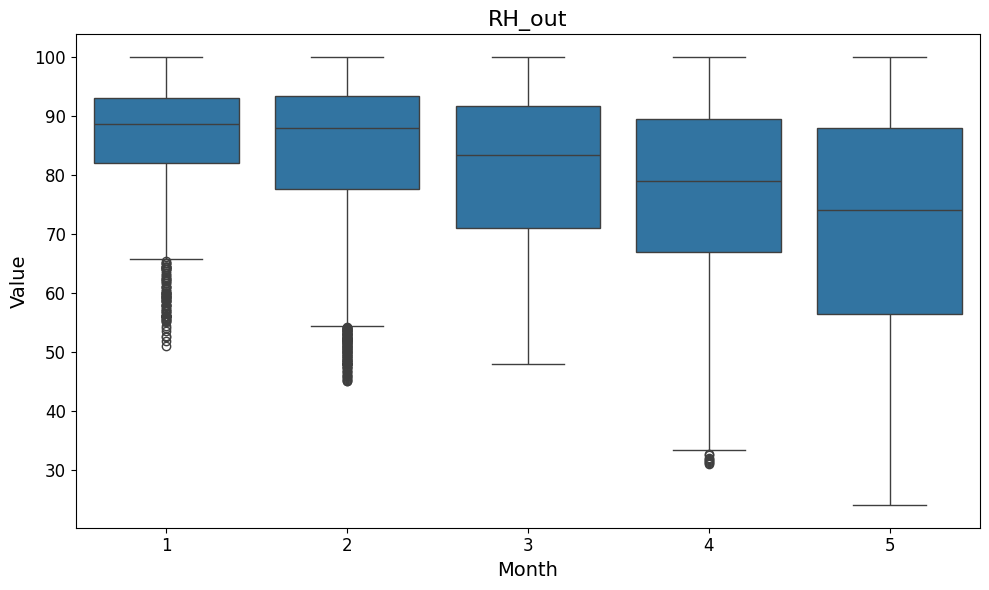

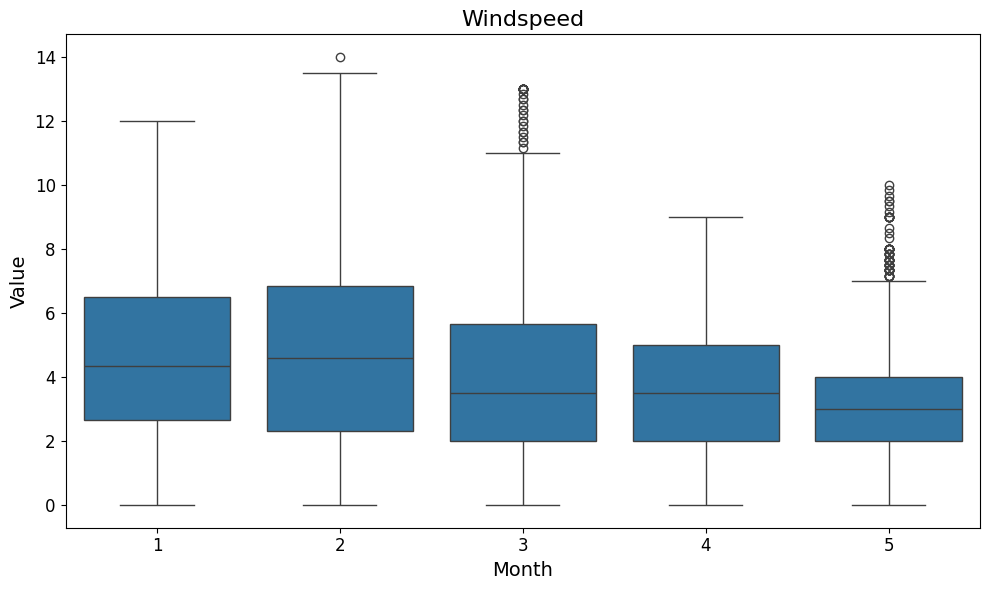

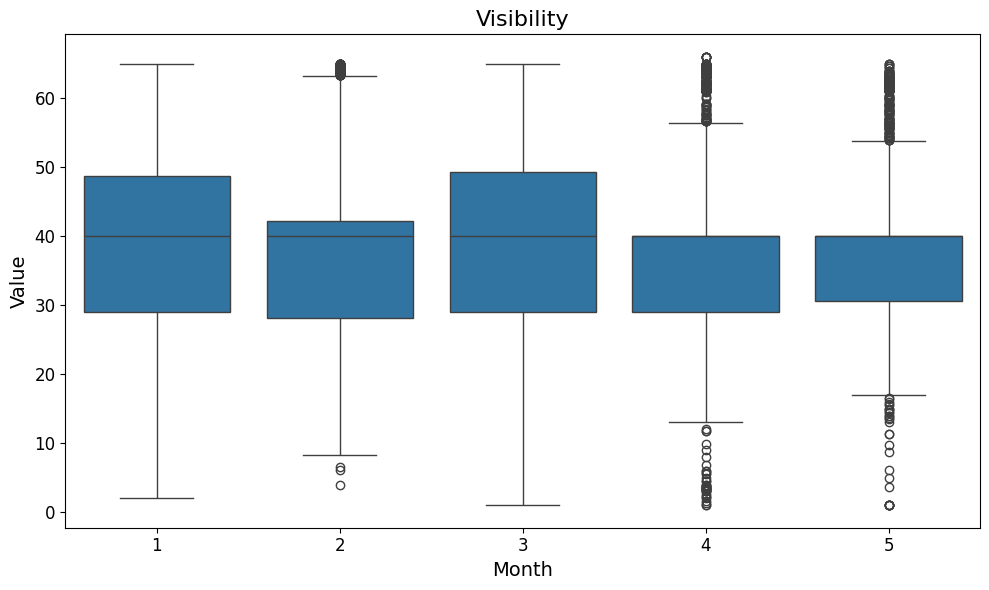

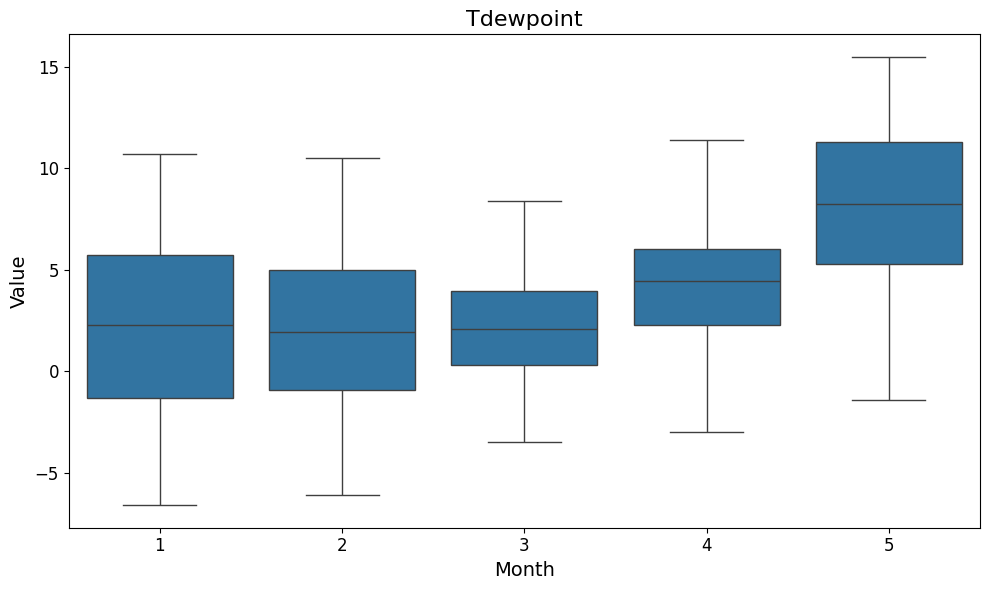

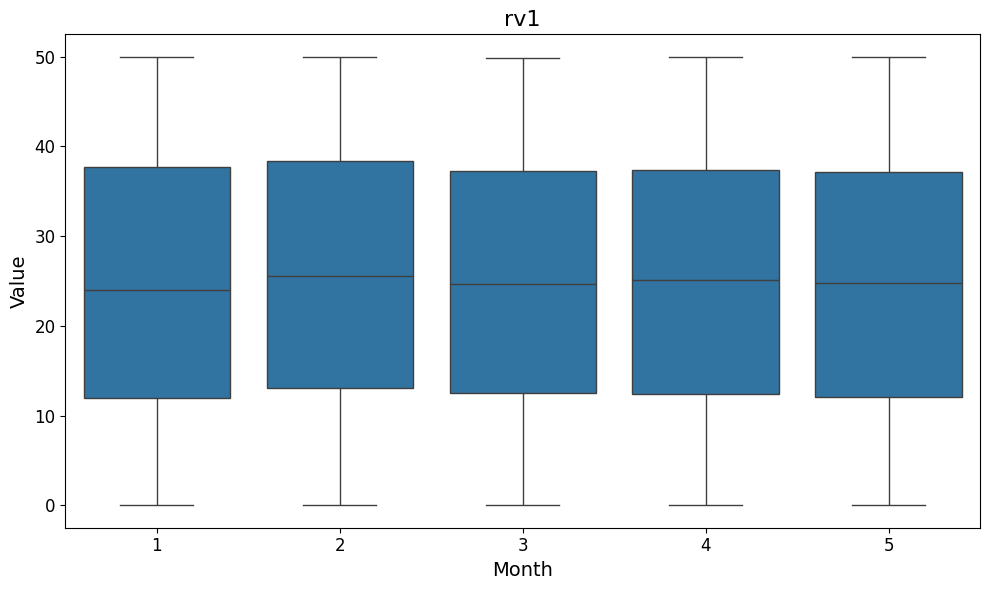

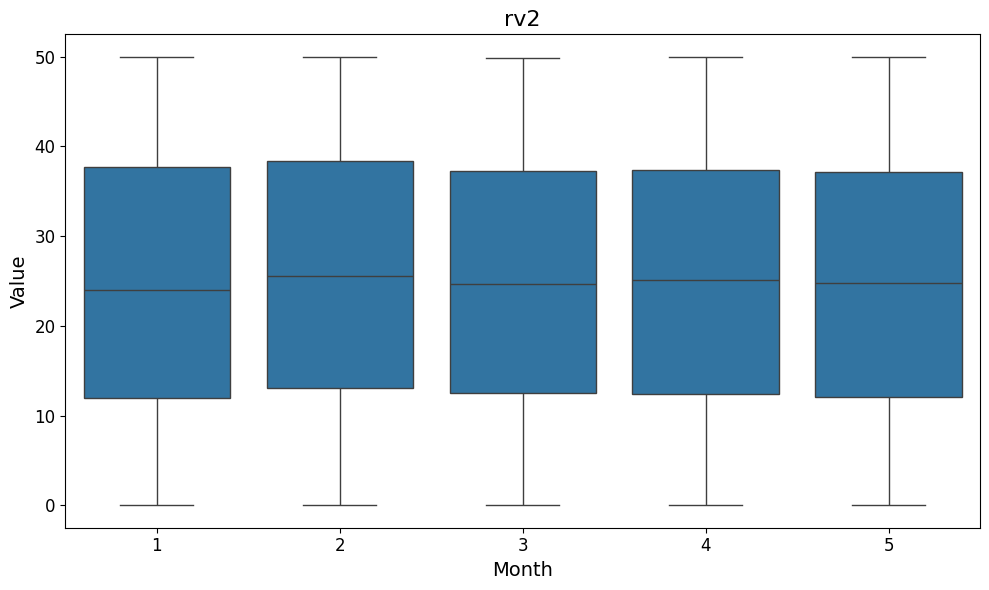

In [32]:
dataset['date']   = pd.to_datetime(dataset['date'])
dataset['Month']  = dataset['date'].dt.month

selected_columns = [col for col in dataset.columns
                    if col not in ['date','Month']]

# Loop through and plot each one
for col in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Month', y=col, data=dataset)
    plt.title(col, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.close()

Obsevation:

1.   For temperature (T), there is an overall increasing trend in the data.
2.   Other data show no significant features.


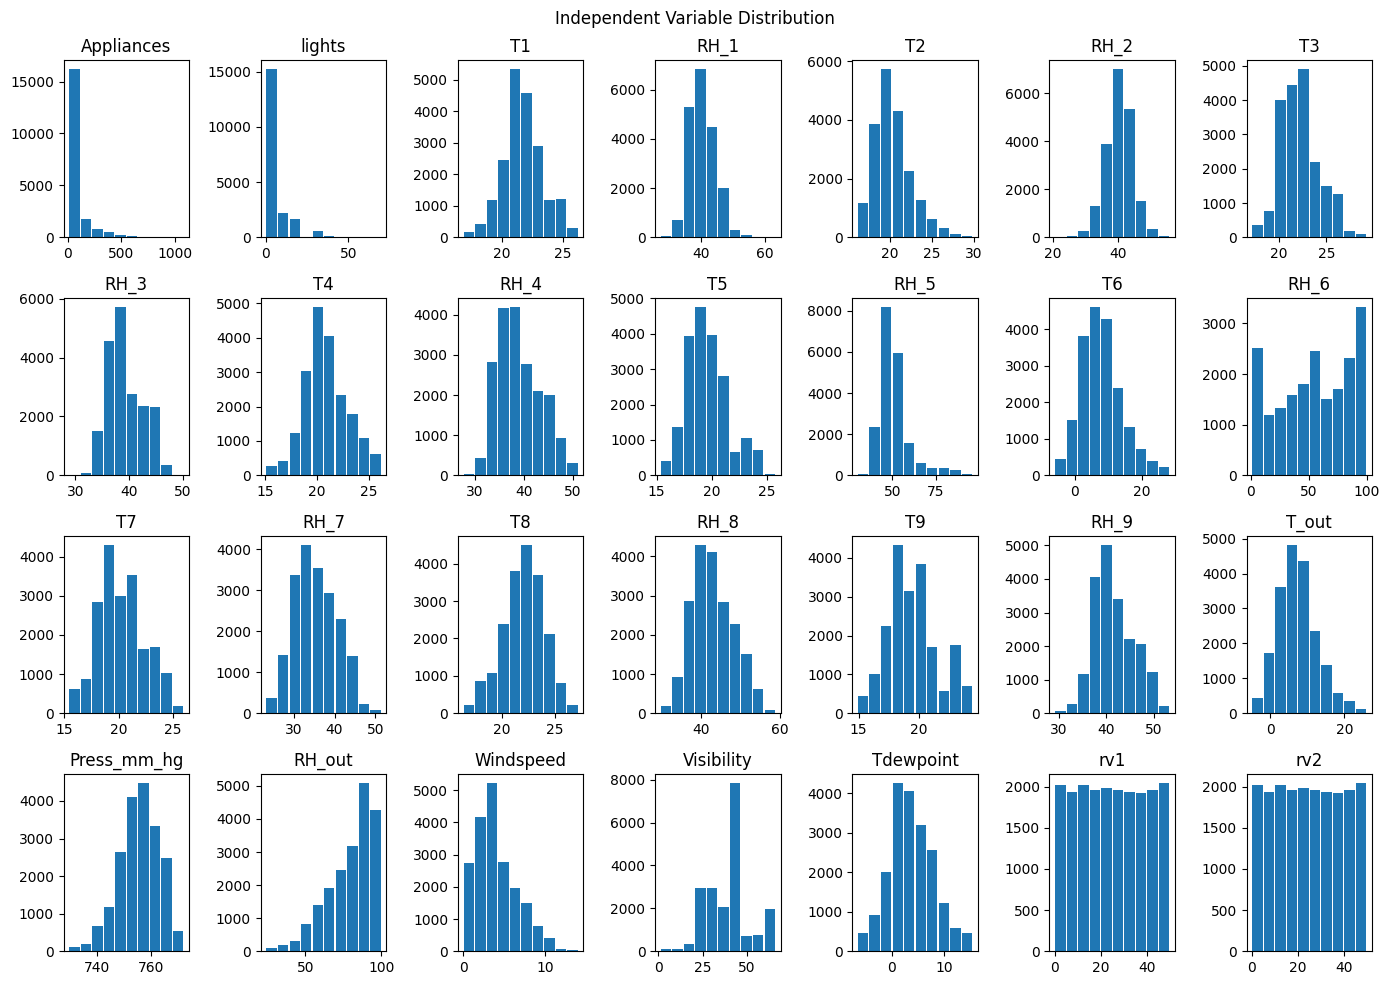

In [34]:
# Creating subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

numerical = dataset.select_dtypes(include=np.number).columns.tolist() # Define 'numerical' to store numerical columns

# Counter for accessing columns
cpt = 0

# Looping through subplots and plotting histograms for each numerical column
for i in range(4):
    for j in range(7):
        var = numerical[cpt]
        axs[i,j].hist(dataset[var].values, rwidth=0.9)
        axs[i,j].set_title(var)
        cpt += 1

fig.suptitle('Independent Variable Distribution')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

Obsevation:

1.   Temperature and humidity exhibit a normal distribution, while other variables may be skewed or display multiple peaks.

A closer look at Appliances

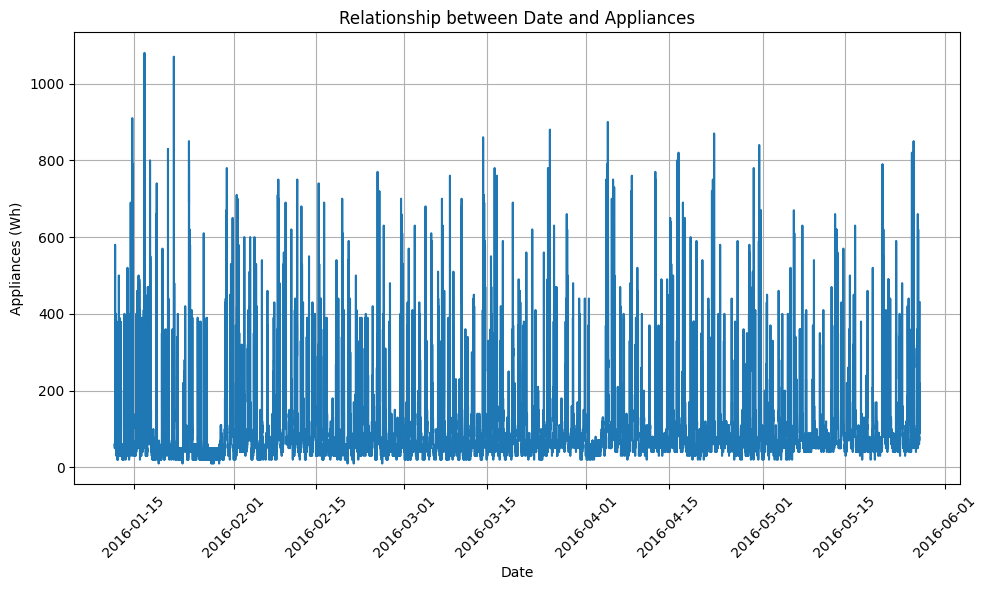

In [35]:
# Plot the relationship between 'date' and 'Appliances'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(dataset['date'], dataset['Appliances'], color='#1f77b4',  linestyle='-')  # Plot with markers
plt.title('Relationship between Date and Appliances')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Observation
* From the plots, we can see that electricity usage (shown by the 'Appliances' variable) doesn't follow a clear or obvious pattern over time. But just because we can't easily see a pattern doesn’t mean there isn’t one. It means we need to look deeper and use data analysis techniques to find any hidden trends or relationships in the data.


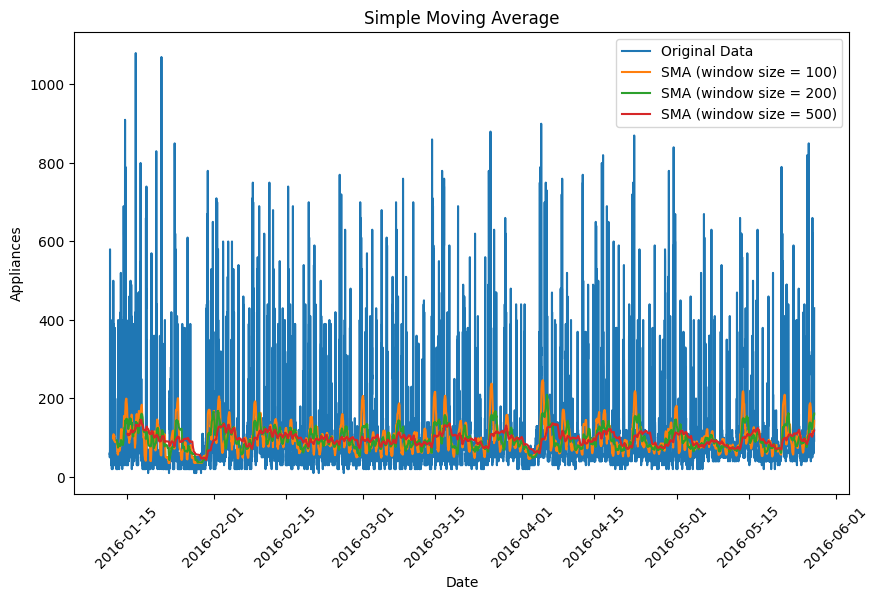

In [36]:
# Calculating the simple moving averages (SMA) of the 'Appliances' column in the data DataFrame using different window sizes
window_size_1 = 100
window_size_2 = 200
window_size_3 = 500
sma_1 = dataset['Appliances'].rolling(window=window_size_1).mean() # get the mean in the time span of 100 past data entries
sma_2 = dataset['Appliances'].rolling(window=window_size_2).mean() # get the mean in the time span of 200 past data entries
sma_3 = dataset['Appliances'].rolling(window=window_size_3).mean() # get the mean in the time span of 300 past data entries

# Draw the plt
plt.figure(figsize=(10, 6))
plt.plot(dataset['date'], dataset['Appliances'], label='Original Data')
plt.plot(dataset['date'], sma_1, label='SMA (window size = {})'.format(window_size_1))
plt.plot(dataset['date'], sma_2, label='SMA (window size = {})'.format(window_size_2))
plt.plot(dataset['date'], sma_3, label='SMA (window size = {})'.format(window_size_3))
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Simple Moving Average')
plt.legend()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

Observation

*  After using the Simple Moving Average (SMA) with window sizes of 100, 200, and 500 to smooth the data, the graphs didn’t show any clear trends. This means that the 'Appliances' usage stayed mostly steady over time, without big changes or patterns.




Visualization of Randomly Selected Weekly Data

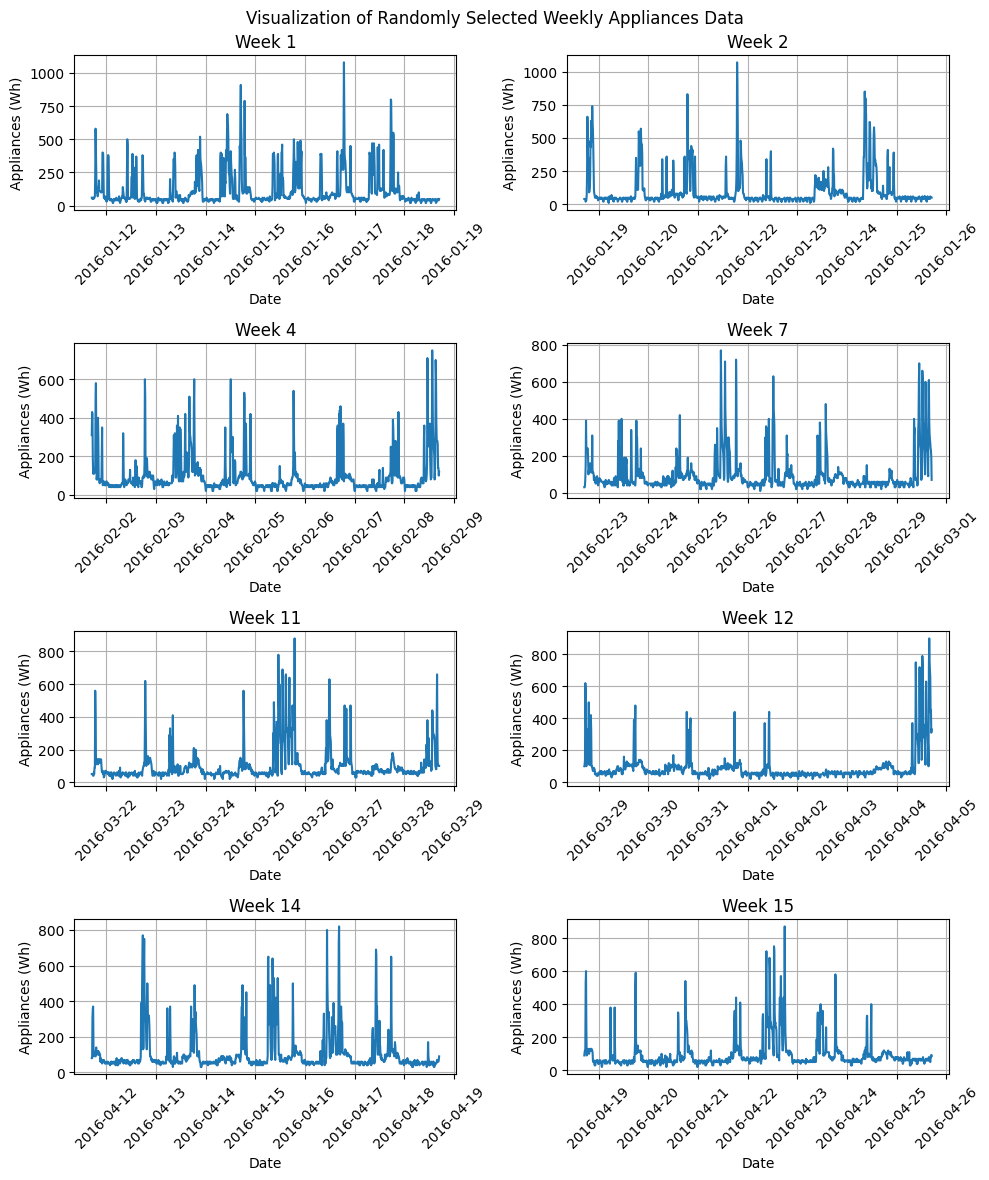

In [43]:
import random

len_weekly_data = 6*24*7 # 10 entries per minute => 6 times per hour => * 24 h * 7 days

# Function to randomly select 8 different weeks from the entire time range
def select_random_weeks(data):
    # Determine the total number of complete weeks
    num_weeks = len(data) // len_weekly_data
    # Randomly select 8 different week indices
    random_week_indices = random.sample(range(num_weeks), 8)
    # Sort the selected week indices
    random_week_indices.sort()
    return random_week_indices

# Randomly select 8 different weeks
random_week_indices = select_random_weeks(dataset)

# Create subplots arranged in a 4x2 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 12))
fig.suptitle('Visualization of Randomly Selected Weekly Appliances Data')

# Plotting each randomly selected week's data
for i in range(4):
    for j in range(2):
        # Calculate the start and end index for the randomly selected week
        start_index = random_week_indices[i * 2 + j] * len_weekly_data
        end_index = start_index + len_weekly_data

        # Filter data for the randomly selected week
        week_data = dataset.iloc[start_index:end_index]

        # Plotting the relationship between 'date' and 'Appliances' for the randomly selected week
        axs[i, j].plot(week_data['date'], week_data['Appliances'], color='#1f77b4', linestyle='-')
        axs[i, j].set_title(f'Week {random_week_indices[i * 2 + j] + 1}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Appliances (Wh)')
        axs[i, j].tick_params(axis='x', rotation=45)
        axs[i, j].grid(True)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

Observation


* When looking at a random week of data, we noticed a clear pattern showing regular ups and downs in energy use. Even though the week was picked at random, similar trends kept appearing, which means there are hidden habits or routines in how appliances are used. This matches what we saw earlier in the hourly analysis.



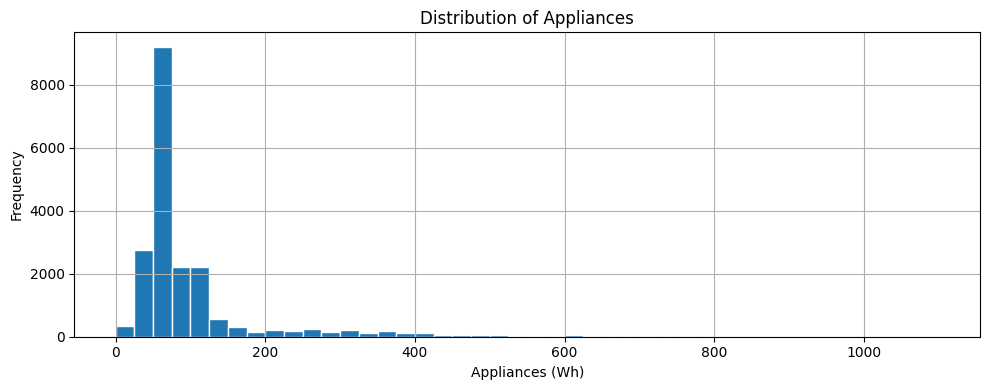

In [44]:
# Plotting the histogram for the "Appliances" column
plt.figure(figsize=(10, 4))  # Setting the figure size
bin_width = 25  # Define the bin width
max_value = int(max(dataset['Appliances']))
bins = range(0, max_value + bin_width, bin_width)  # Define the bins with a gap of 50 units starting from 0
plt.hist(dataset['Appliances'], bins=bins, color='#1f77b4', edgecolor='white')  # Plotting histogram with specified bins
plt.title('Distribution of Appliances')  # Adding title
plt.xlabel('Appliances (Wh)')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding gridlines
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

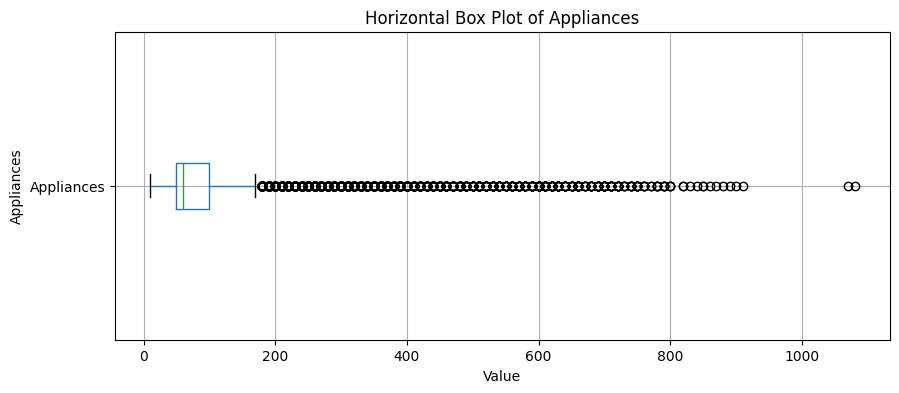

In [45]:
dataset.boxplot(column='Appliances', vert=False, figsize=(10, 4))

# Add title and labels
plt.title('Horizontal Box Plot of Appliances')
plt.xlabel('Value')
plt.ylabel('Appliances')

# Show the plot
plt.show()

Observation


*   The box plot has a long right-hand side tail, it indicates that it is positively skewed with some high energy use.




**Correlation analysis**

In [58]:
# Delete date time stamps and irrelavant columns
df_energy = df_energy.drop(['Date', 'Time', 'rv1', 'rv2'], axis=1)

# Auto-check if there is any format that is not 'float64' or 'int64'
for column in df_energy.columns:
    if df_energy[column].dtype != 'float64' and df_energy[column].dtype != 'int64':
        print(f"Column '{column}' has non-numeric data type: {df_energy[column].dtype}")


Column 'hour' has non-numeric data type: int32
Column 'month' has non-numeric data type: int32
Column 'day_of_week' has non-numeric data type: int32


In [60]:
# We can see from above that the 'hour' 'month' and 'day_of_week' is of data type 'int32', which cannot be used for correlation analysis
# We should change the format first.

df_energy['hour'] = df_energy['hour'].astype(float)
df_energy['month'] = df_energy['month'].astype(float)
df_energy['day_of_week'] = df_energy['day_of_week'].astype(float)

# Check type again.
print(df_energy.dtypes)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
hour           float64
month          float64
day_of_week    float64
dtype: object


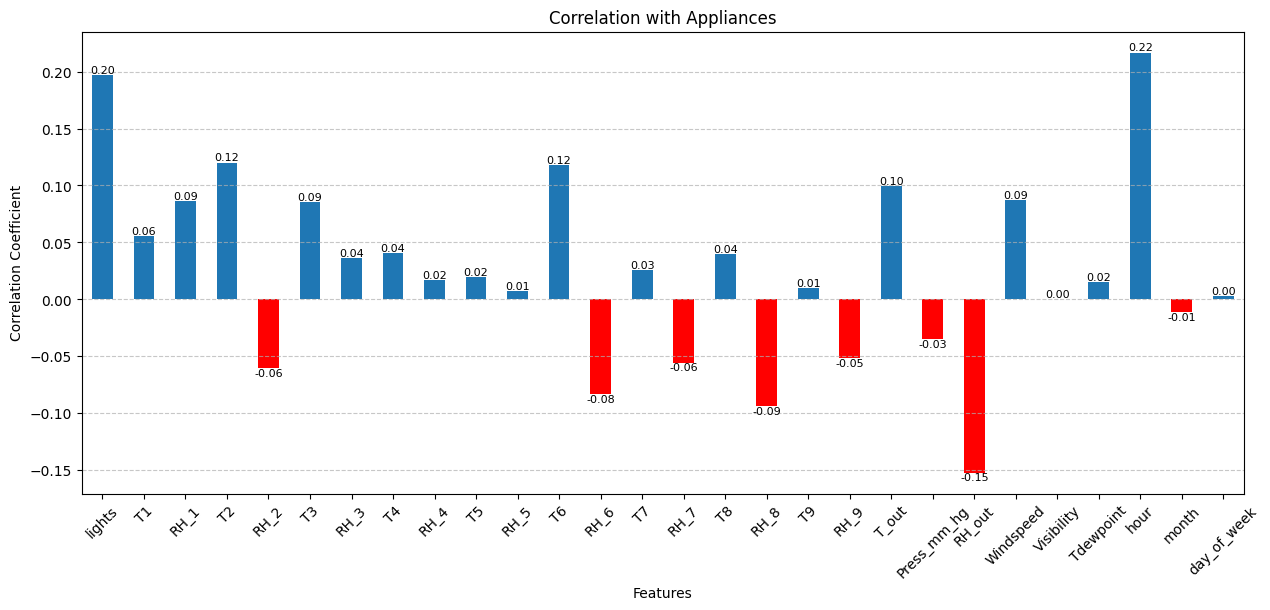

In [61]:
# Calculate correlation coefficients
correlations = df_energy.corr()['Appliances'].drop(['Appliances'])

# Plotting the correlations
plt.figure(figsize=(15, 6))

# Define colors based on correlation values
colors = ['red' if corr < 0 else '#1f77b4' for corr in correlations]

# Plot the bar chart with custom colors
bars = correlations.plot(kind='bar', color=colors)

# Add text annotations
for i, corr in enumerate(correlations):
    if corr < 0:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='top', fontsize=8)
    else:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='bottom', fontsize=8)


plt.title('Correlation with Appliances')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observation


*  The time of day shows the strongest link to appliance electricity use (correlation: 0.22), followed by the number of lights on (0.20). Air pressure has a weak negative correlation (-0.15), suggesting that appliance usage slightly decreases as air pressure rises.




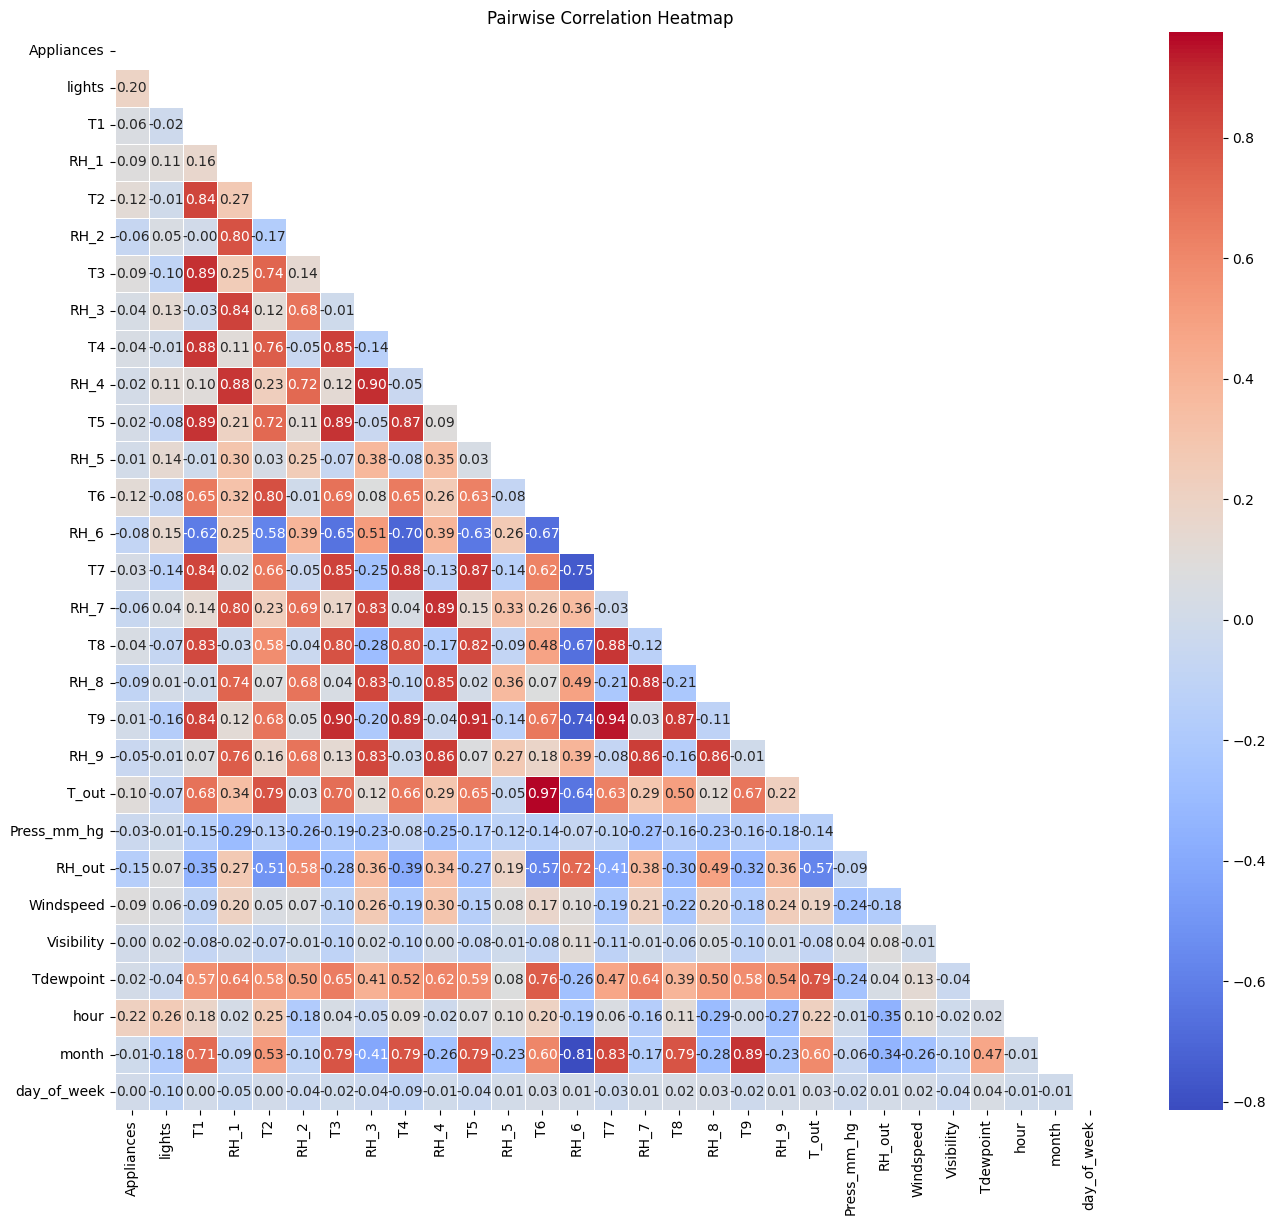

In [73]:
# Calculate pairwise correlations
corr_matrix = df_energy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Pairwise Correlation Heatmap')
plt.show()

Observation :

This heatmap shows how different features are related to each other. We can see that temperatures are strongly linked with each other, and humidity levels also show some positive relationships, but not as strong.

One interesting point is RH_6, which measures outdoor humidity. It has a strong negative relationship with temperature — meaning that when the temperature goes up, outdoor humidity tends to go down.

On the other hand, our target feature, 'Appliances', doesn't show a strong relationship with any of the temperature or humidity features. So, these factors might not directly affect how much electricity appliances use.




Clustering Analysis

In [77]:
# Selecting features for clustering (excluding 'Appliances' since it's the target feature) that with an abstract value of over 0.06.
data_cluster = df_energy[['Appliances','lights','T2','RH_2','T3','T6','RH_6','RH_7','RH_8','T_out','Press_mm_hg','RH_out','hour']]
data_cluster

Appliances  lights         T2       RH_2         T3         T6  \
0              60      30  19.200000  44.790000  19.790000   7.026667   
1              60      30  19.200000  44.722500  19.790000   6.833333   
2              50      30  19.200000  44.626667  19.790000   6.560000   
3              50      40  19.200000  44.590000  19.790000   6.433333   
4              60      40  19.200000  44.530000  19.790000   6.366667   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.890000  42.025714  27.200000  24.796667   
19731          90       0  25.754000  42.080000  27.133333  24.196667   
19732         270      10  25.628571  42.768571  27.050000  23.626667   
19733         420      10  25.414000  43.036000  26.890000  22.433333   
19734         430      10  25.264286  42.971429  26.823333  21.026667   

            RH_6       RH_7       RH_8      T_out  Press_mm_hg     RH_out  \
0      84.256667  41.626667  48.900000   6.600000        733.5  92.000000   
1      84.063333  41.560000  48.863333   6.483333        733.6  92.000000   
2      83.156667  41.433333  48.730000   6.366667        733.7  92.000000   
3      83.423333  41.290000  48.590000   6.250000        733.8  92.000000   
4      84.893333  41.230000  48.590000   6.133333        733.9  92.000000   
...          ...        ...        ...        ...          ...        ...   
19730   1.000000  44.500000  50.074000  22.733333        755.2  55.666667   
19731   1.000000  44.414286  49.790000  22.600000        755.2  56.000000   
19732   1.000000  44.400000  49.660000  22.466667        755.2  56.333333   
19733   1.000000  44.295714  49.518750  22.333333        755.2  56.666667   
19734   1.000000  44.054000  49.736000  22.200000        755.2  57.000000   

       hour  
0      17.0  
1      17.0  
2      17.0  
3      17.0  
4      17.0  
...     ...  
19730  17.0  
19731  17.0  
19732  17.0  
19733  17.0  
19734  18.0  

[19735 rows x 13 columns]

In [78]:
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

In [80]:
from sklearn.cluster import KMeans

# Create a KMeans analyzer
kmeans = KMeans(n_clusters=5, random_state=42)

# Run the KMeans analysis
kmeans.fit(data_cluster_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the 'cluster' column to the DataFrame
data_cluster['cluster'] = cluster_labels

# Print the size of each cluster
for cluster_label in range(5):
    cluster_size = len(cluster_labels[cluster_labels == cluster_label])
    print(f"Cluster {cluster_label}: {cluster_size} data points")


Cluster 0: 4822 data points
Cluster 1: 4732 data points
Cluster 2: 4236 data points
Cluster 3: 3328 data points
Cluster 4: 2617 data points


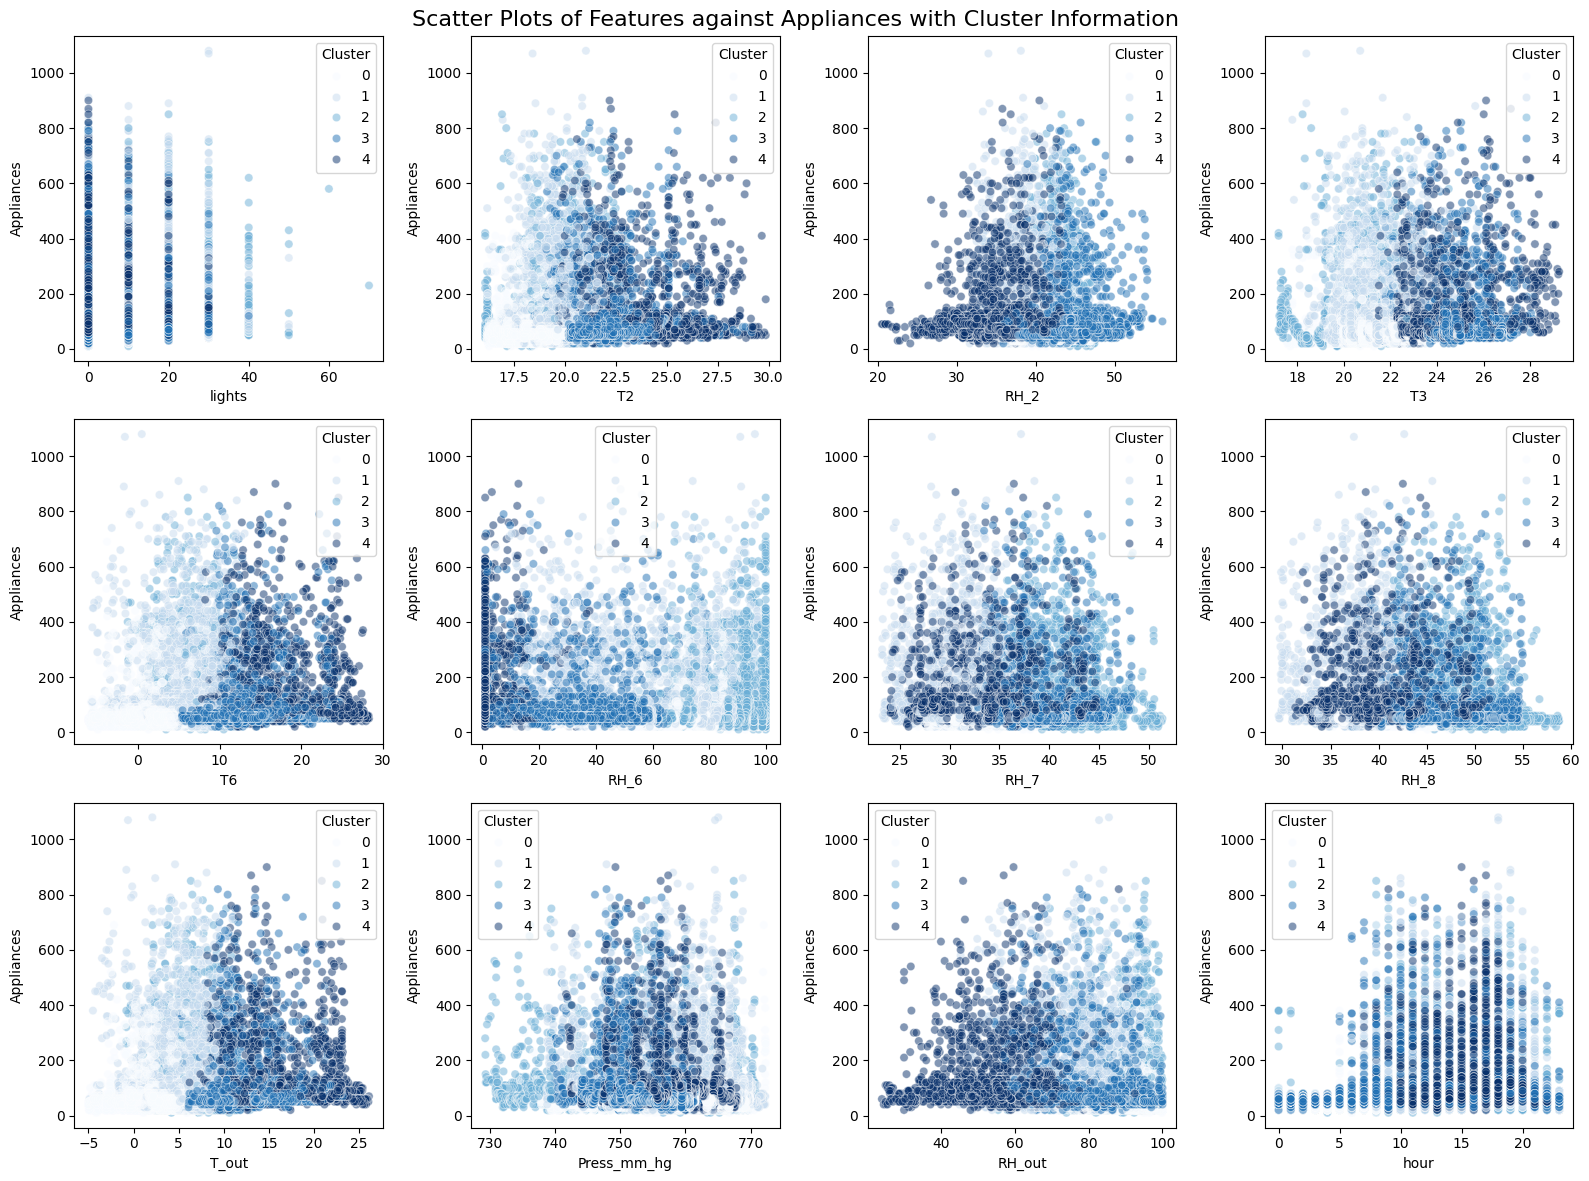

In [84]:
# Create a subplot grid containing all features
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Flatten axs into a 1D array for iteration
axs = axs.flatten()

# Get the names of all feature columns except the target variable 'Appliances'
feature_columns = data_cluster.columns.drop('Appliances')

# Plot scatter plot of each feature against the target variable 'Appliances' and color by cluster
for i, feature in enumerate(feature_columns):
    # Check if the subplot index is within bounds
    if i < len(axs):
        sns.scatterplot(x=feature, y='Appliances', hue='cluster', data=data_cluster, ax=axs[i], alpha=0.5, palette='Blues')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Appliances')
        axs[i].legend(title='Cluster')

plt.suptitle('Scatter Plots of Features against Appliances with Cluster Information', fontsize=16)

# Adjust spacing and layout of subplots
plt.tight_layout()
plt.show()

Observation


*   The clusters in the data are clearly separated, especially in temperature-related plots, which show distinct groupings. Humidity-related plots show less clear separation. There’s also a visible pattern related to lights. Overall, the data seems to be grouped well, making the classification look reliable.




<h3><b>Implement prediction models<b></h3>

**ARIMA model implementing**

Seasonal decomposition

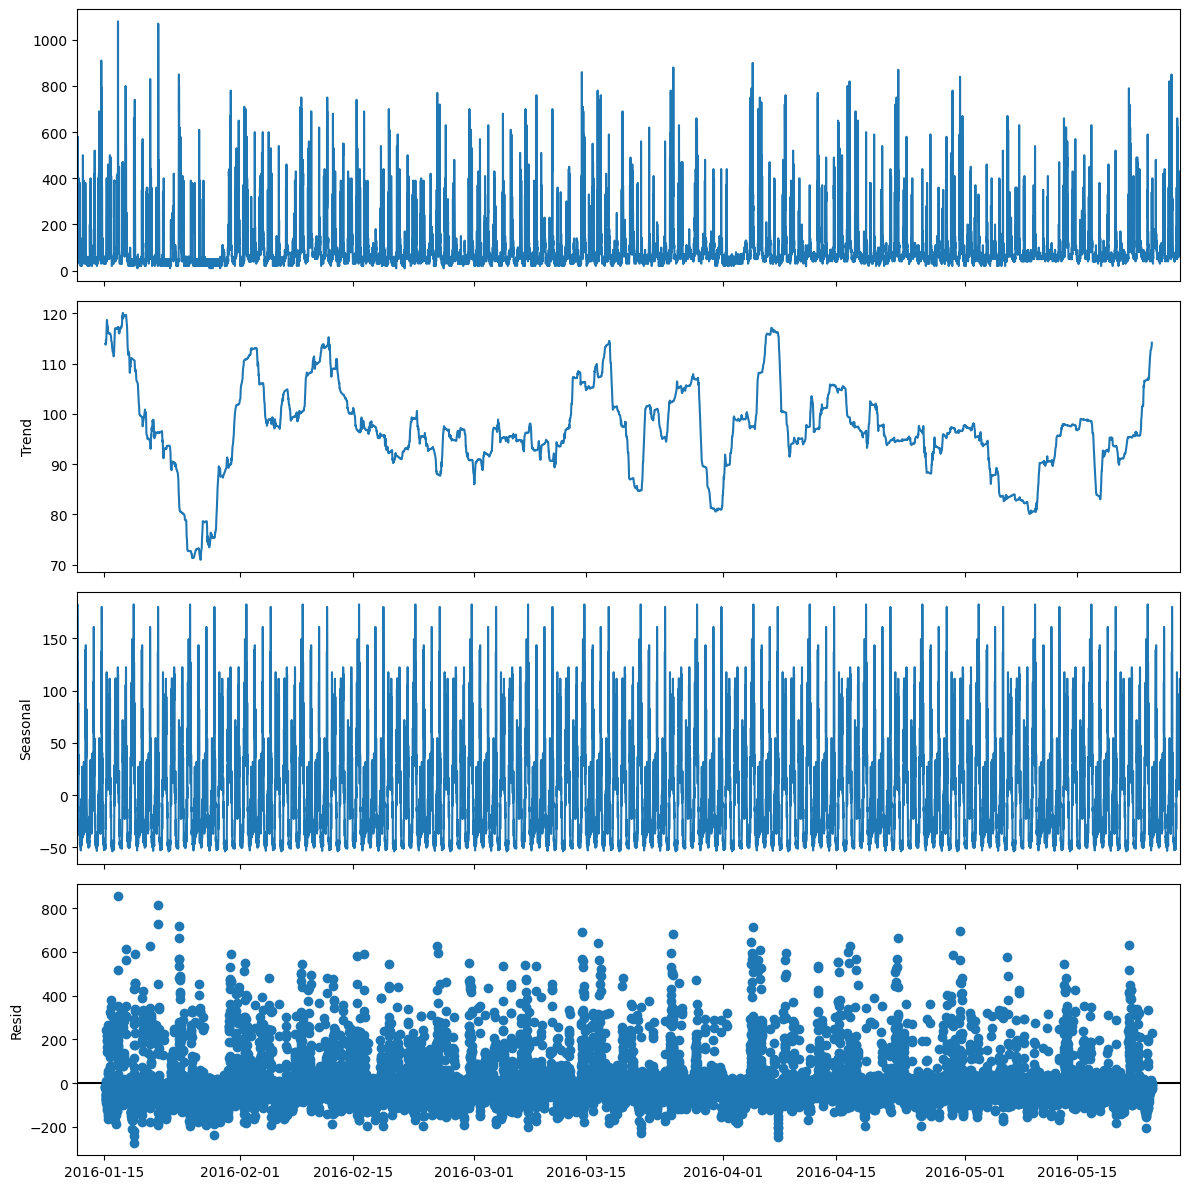

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from matplotlib import pyplot

# Prepare data to be trained. Here we just use the target feature 'Appliances' together with the time feature 'date'
data_arima = df_energy[['Appliances', 'date']] # ensure datetime type
data_arima = data_arima.set_index('date')

decomp_period  = 6*24*7 # Assuming data is sampled every 10 minutes -- 1 week

# Use the lib to decompose a time series into its constituent components: trend, seasonality, and residuals
result = seasonal_decompose(data_arima, period=decomp_period, model='additive')
rcParams['figure.figsize'] = 12, 12
fig = result.plot()
pyplot.show()

# Explicitly store the result's attribute to new variables.
residual = result.resid
seasonal = result.seasonal
trend = result.trend

In [179]:
# Checking if there are any null values.
residual.isnull().values.any()

np.True_

In [180]:
# dopping NaN values
residual.dropna(inplace=True)

In [181]:
print(residual.head())

date
2016-01-15 05:00:00   -15.840400
2016-01-15 05:10:00   -22.652744
2016-01-15 05:20:00   -14.733727
2016-01-15 05:30:00   -15.757380
2016-01-15 05:40:00   -16.233571
Name: resid, dtype: float64


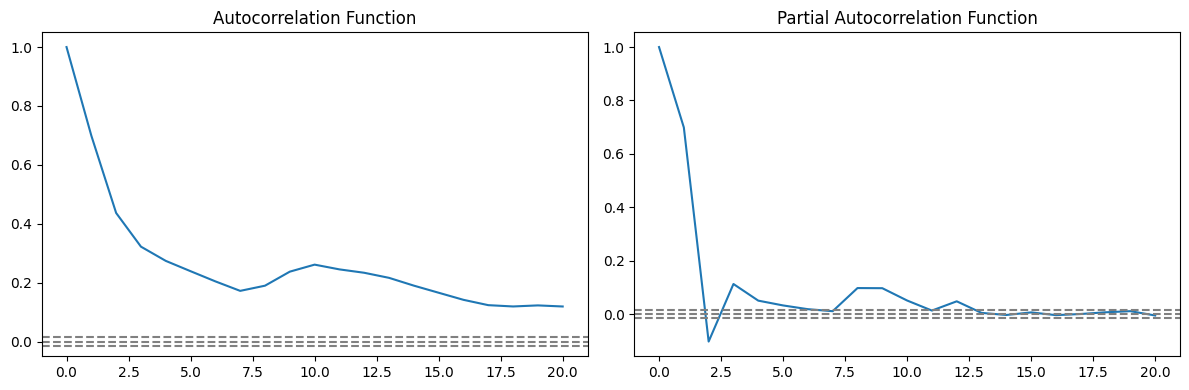

In [182]:
from statsmodels.tsa.stattools import acf, pacf

# Calculating the autocorrelation function (ACF) of the residuals with a lag of 20
acf_cases = acf(residual, nlags = 20)

# Calculating the partial autocorrelation function (PACF) of the residuals with a lag of 20 using the OLS (Ordinary Least Squares) method
pacf_cases = pacf(residual, nlags = 20, method = 'ols')

rcParams['figure.figsize'] = 12, 4
plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


ACF & PACF

(0.0, 1.2)

<Figure size 1000x400 with 0 Axes>

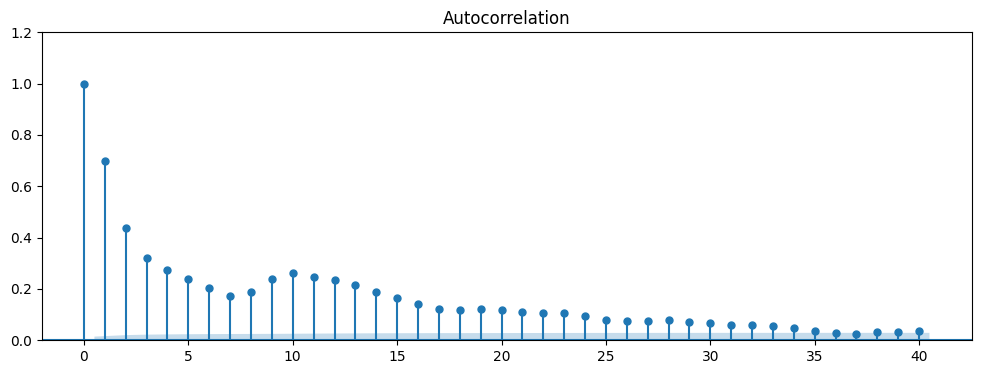

In [183]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 4))  # Set the figure size

plot_acf(residual, lags = 40)
plt.ylim(0, 1.2)  # set the range of Y axis

(-0.2, 1.2)

<Figure size 1000x400 with 0 Axes>

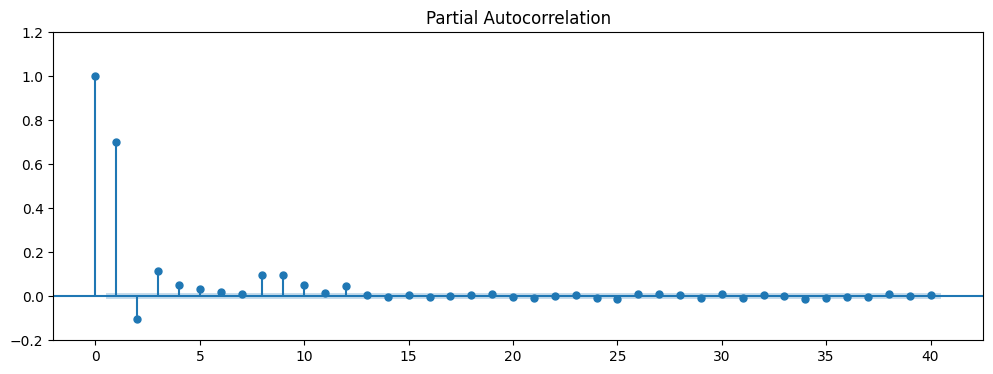

In [184]:
plt.figure(figsize=(10, 4))  # Set the figure size
plot_pacf(residual, lags = 40)
plt.ylim(-0.2, 1.2)  # set the range of Y axis

we can see that lag before 2 of the lags are out of the significance limit or below the threshold so we can say that the optimal value of our p and q is 3.

**LSTM model implementing**

In [158]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error


# 1. Select ALL features you want to use for LSTM (including 'Appliances'):
features_for_lstm = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
                     'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
                     'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg',
                     'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'lights',
                     'hour', 'month', 'day_of_week']

# 2. Create a DataFrame with selected features:
lstm_data = df_energy[features_for_lstm]

# 3. Convert to NumPy array and ensure data type is float32:
lstm_data_values = lstm_data.values.astype('float32')

# 4. Normalize the dataset using MinMaxScaler:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_lstm_data = scaler.fit_transform(lstm_data_values)

# 5. Split into train and test sets:
train_size = int(len(scaled_lstm_data) * 0.8)
test_size = len(scaled_lstm_data) - train_size
train, test = scaled_lstm_data[0:train_size,:], scaled_lstm_data[train_size:len(scaled_lstm_data),:]


In [159]:
# --- Updated create_dataset function to handle multiple features ---
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]  # Get all features for the look_back period
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])  # Target is still 'Appliances' (first column)
    return np.array(dataX), np.array(dataY)

# --- Example of how to use the updated create_dataset function ---
look_back = 3  # Set your desired look_back value
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


**Machine Learning Methods**

Preparing data for machine learning methods

In [108]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split


x = dataset.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint','rv1','rv2'],axis=1)
y = dataset['Appliances'] # set target feature


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


import random forest regressor and gradient boosting regressor

In [109]:
# 2 models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

<h3><b>Train prediction models<b></h3>

**ARIMA model training**

In [185]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model, with p, d, q as 3, 0, 3
model_AR = ARIMA(residual, order=(3, 0, 3), freq='10T')

# Fit model
results_AR = model_AR.fit() # 10 mins per capture

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


**LSTM model training**

In [161]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
15784/15784 - 59s - 4ms/step - loss: 0.0055
Epoch 2/3
15784/15784 - 69s - 4ms/step - loss: 0.0043
Epoch 3/3
15784/15784 - 81s - 5ms/step - loss: 0.0042


**Random Forest model training**

In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
params = {'n_estimators': [100,200,500],'max_depth':[3,5,8]}

# Reduce the number of folds for cross-validation
folds = 3

# Use RandomizedSearchCV instead of GridSearchCV
model_cv_1 = RandomizedSearchCV(estimator=rf,
                                param_distributions=params,
                                scoring='neg_mean_absolute_error',
                                cv=folds,
                                return_train_score=True,
                                n_iter=10,  # Number of parameter settings sampled
                                verbose=1,
                                n_jobs=-1)

# Fit the model
model_cv_1.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8],
                                        'n_estimators': [100, 200, 500]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

**Gradient Boosting Regressor training**

In [113]:
# GradientBoostingRegressor
params = {'max_depth': [1,2,3]}

# cross validation
folds = 3
model_cv_2 = GridSearchCV(estimator = gb,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv_2.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

<h3><b>Test predictin models and show results<b></h3>

**ARIMA model predictions**

Residual predictions

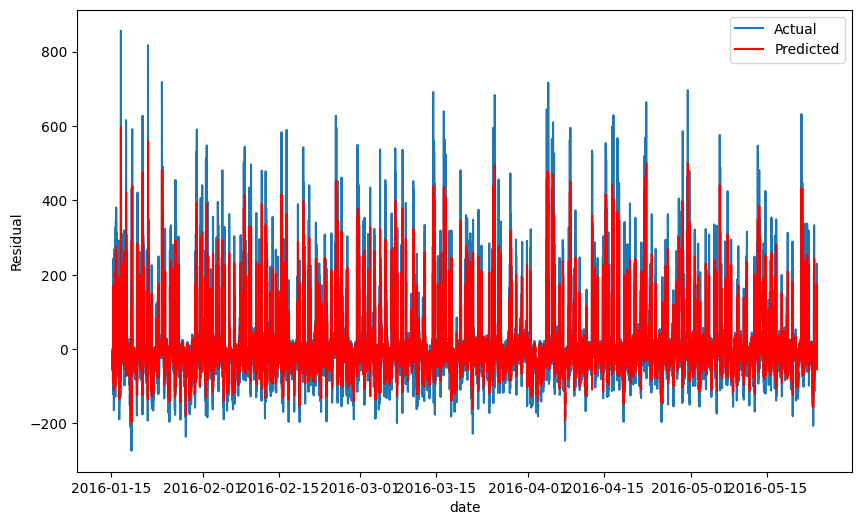

In [186]:
# ARIMA
plt.figure(figsize=(10, 6))  # Set the figure size

# Draw the outcome
plt.plot(residual, label='Actual')
plt.plot(results_AR.fittedvalues, color='red', label='Predicted')
plt.xlabel("date")
plt.ylabel("Residual")
plt.legend(loc="best")

Final predictions

In [172]:
# We choose a later period of time to make predictions.
start_time = "2016-01-15 17:00:00"
end_time = "2016-05-27 18:00:00"
predictions = results_AR.predict(start=start_time, end=end_time, dynamic=False, freq='10T')

In [187]:
predictions

2016-01-15 17:00:00   -69.068783
2016-01-15 17:10:00   -44.970133
2016-01-15 17:20:00   -37.958415
2016-01-15 17:30:00   -59.941220
2016-01-15 17:40:00   -47.876292
                         ...    
2016-05-27 17:20:00    -0.155686
2016-05-27 17:30:00    -0.155686
2016-05-27 17:40:00    -0.155686
2016-05-27 17:50:00    -0.155686
2016-05-27 18:00:00    -0.155686
Freq: 10min, Name: predicted_mean, Length: 19159, dtype: float64

In [188]:
# Add back trend + seasonal, or otherwise the whole prediction will be definitely lower than original data
final_predictions = predictions + trend + seasonal
final_predictions.shape

(19735,)

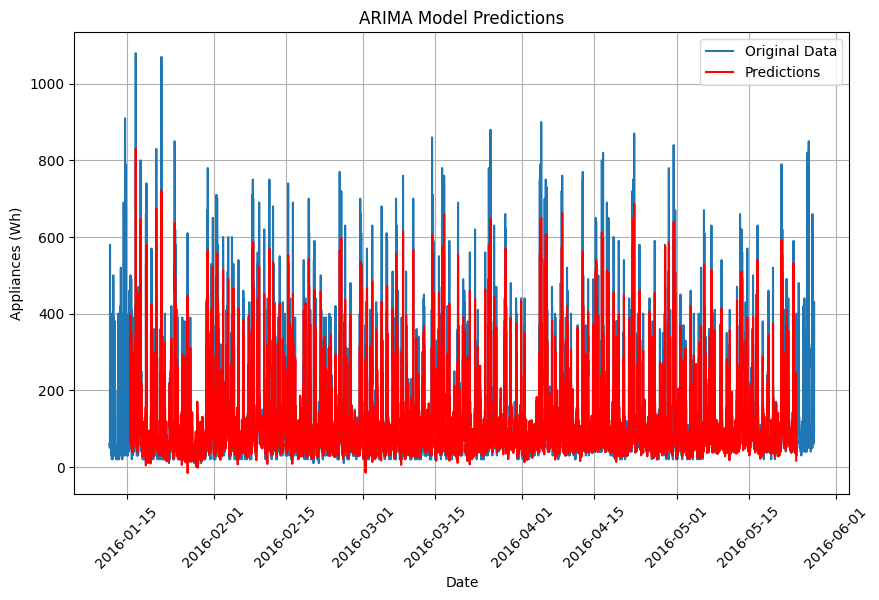

In [190]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot original data
plt.plot(df_energy['date'], data_arima['Appliances'], label='Original Data')

# Plot predictions
plt.plot(df_energy['date'], final_predictions, color='red', label='Predictions')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.title('ARIMA Model Predictions')

# Add legend
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines

# Show plot
plt.show()

**LSTM predictions**

494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


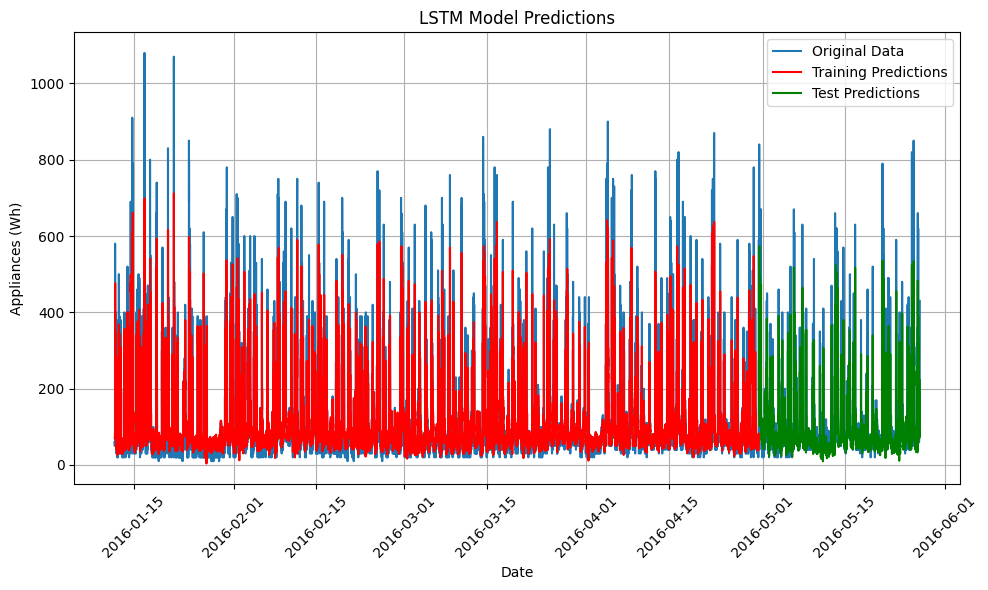

In [162]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert scaling to get actual values
trainPredict = scaler.inverse_transform(np.repeat(trainPredict, scaled_lstm_data.shape[1], axis=1))[:,0]
testPredict = scaler.inverse_transform(np.repeat(testPredict, scaled_lstm_data.shape[1], axis=1))[:,0]
trainY = scaler.inverse_transform(np.repeat(trainY.reshape(-1,1), scaled_lstm_data.shape[1], axis=1))[:,0]
testY = scaler.inverse_transform(np.repeat(testY.reshape(-1,1), scaled_lstm_data.shape[1], axis=1))[:,0]

# Instead of using df_energy['date'], create a date range using the length of your data
dates = pd.date_range(start=dataset['date'].min(), periods=len(dataset), freq='10min') # assuming 10-minute frequency

# Shift predictions for plotting
# Create an empty array with the desired shape and data type (float64)
trainPredictPlot = np.empty(len(dates), dtype=np.float64)
# Fill the array with NaN values
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict

# Create an empty array with the desired shape and data type (float64) for test predictions
testPredictPlot = np.empty(len(dates), dtype=np.float64)
# Fill the array with NaN values
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dates)-1] = testPredict


# Plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, df_energy['Appliances'], color='#1f77b4', label='Original Data') # original data
plt.plot(dates, trainPredictPlot, color='red', label='Training Predictions') # shifted train predictions
plt.plot(dates, testPredictPlot, color='green', label='Test Predictions') # shifted test predictions

plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

**Random Forest predictions**

In [127]:
#final RandomForestRegressor

rf = RandomForestRegressor(max_depth=8, n_estimators=500,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

In [128]:
RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

**Gradient Boosting Regressor predictions**

In [130]:
#final GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=5,random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [131]:
GradientBoostingRegressor(max_depth=5, random_state=42)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [132]:
gb_test_pred = gb.predict(x_test)

<h3><b>Compare the results from all candidate models, choose the best model<b></h3>


**ARIMA**

In [191]:
data_subset = data_arima['Appliances'][(data_arima.index >= start_time) & (data_arima.index <= end_time)]

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_ar = np.mean(np.abs(data_subset- final_predictions))
mse_ar = np.mean((data_subset- final_predictions) ** 2)
rmse_ar = np.sqrt(mse_ar)
mape_ar = np.mean(np.abs((data_subset- final_predictions) / data_subset)) * 100

print("Mean Absolute Error (MAE) for ARIMA:", mae_ar)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_ar)
print("Mean Absolute Percentage Error (MAPE) for ARIMA:", mape_ar)

Mean Absolute Error (MAE) for ARIMA: 30.430244389165125
Root Mean Squared Error (RMSE) for ARIMA: 62.33467043581296
Mean Absolute Percentage Error (MAPE) for ARIMA: 31.594001259453048


**LSTM**

In [163]:
# Calculate MAE, RMSE, and MAPE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lstm = mean_absolute_error(np.concatenate((trainY, testY)), np.concatenate((trainPredict, testPredict)))
rmse_lstm = np.sqrt(mean_squared_error(np.concatenate((trainY, testY)), np.concatenate((trainPredict, testPredict))))
mape_lstm = np.mean(np.abs((np.concatenate((trainY, testY)) - np.concatenate((trainPredict, testPredict))) / np.concatenate((trainY, testY))) * 100)

print("Mean Absolute Error (MAE) for LSTM:", mae_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)
print("Mean Absolute Percentage Error (MAPE) for LSTM:", mape_lstm)

Mean Absolute Error (MAE) for LSTM: 30.49917984008789
Root Mean Squared Error (RMSE) for LSTM: 66.15400991129525
Mean Absolute Percentage Error (MAPE) for LSTM: 31.252895


**Random Forest**

In [139]:
# Predict on the test set and store the results in rf_test_pred
rf_test_pred = rf.predict(x_test)

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_rf = metrics.mean_absolute_error(y_test, rf_test_pred)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))
mape_rf = np.mean(np.abs((y_test - rf_test_pred) / y_test)) * 100

# Calculate R-squared
r2_rf = metrics.r2_score(y_test, rf_test_pred)

print("Mean Absolute Error (MAE) for RF:", mae_rf)
print("Root Mean Squared Error (RMSE) for RF:", rmse_rf)
print("Mean Absolute Percentage Error (MAPE) for RF:", mape_rf)
print("R-squared for RF:", r2_rf)

Mean Absolute Error (MAE) for RF: 44.99424619020264
Root Mean Squared Error (RMSE) for RF: 83.49559904823651
Mean Absolute Percentage Error (MAPE) for RF: 52.11667094759201
R-squared for RF: 0.3033425003435505


**Gradient Boosting**

In [140]:
# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_gb = metrics.mean_absolute_error(y_test, gb_test_pred)
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred))
mape_gb = np.mean(np.abs((y_test - gb_test_pred) / y_test)) * 100

# Calculate R-squared
r2_gb = metrics.r2_score(y_test, gb_test_pred)

print("Mean Absolute Error (MAE) for GB:", mae_gb)
print("Root Mean Squared Error (RMSE) for GB:", rmse_gb)
print("Mean Absolute Percentage Error (MAPE) for GB:", mape_gb)
print("R-squared for GB:", r2_gb)

Mean Absolute Error (MAE) for GB: 41.618740815093545
Root Mean Squared Error (RMSE) for GB: 78.7710393221513
Mean Absolute Percentage Error (MAPE) for GB: 46.484278532018166
R-squared for GB: 0.37995201826697966


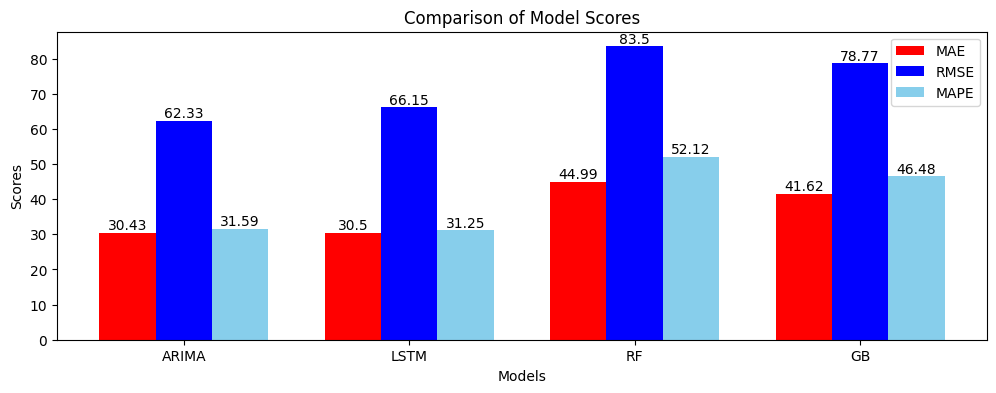

In [192]:
import numpy as np
import matplotlib.pyplot as plt

models = ['ARIMA', 'LSTM', 'RF', 'GB']

mae_scores = [mae_ar, mae_lstm, mae_rf, mae_gb]
rmse_scores = [rmse_ar, rmse_lstm, rmse_rf, rmse_gb]
mape_scores = [mape_ar, mape_lstm, mape_rf, mape_gb]

bar_width = 0.25

index = np.arange(len(models))

plt.bar(index - bar_width, mae_scores, bar_width, label='MAE', color='red')

plt.bar(index, rmse_scores, bar_width, label='RMSE', color='blue')

plt.bar(index + bar_width, mape_scores, bar_width, label='MAPE', color='skyblue')

for i in range(len(models)):
    plt.text(index[i] - bar_width, mae_scores[i] + 0.01, str(round(mae_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i], rmse_scores[i] + 0.01, str(round(rmse_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i] + bar_width, mape_scores[i] + 0.01, str(round(mape_scores[i], 2)), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')

plt.xticks(index, models)

plt.legend()

plt.show()


Data Preprocessing & Feature Engineering

In [200]:
# Feature Engineering
# Create time-based features
df_energy['hour_sin'] = np.sin(2 * np.pi * df_energy['hour'] / 24)
df_energy['hour_cos'] = np.cos(2 * np.pi * df_energy['hour'] / 24)
df_energy['day_sin'] = np.sin(2 * np.pi * df_energy['day_of_week'] / 7)
df_energy['day_cos'] = np.cos(2 * np.pi * df_energy['day_of_week'] / 7)

# Lag features for time series
df_energy['Appliances_lag1'] = df_energy['Appliances'].shift(1)
df_energy['Appliances_lag2'] = df_energy['Appliances'].shift(2)
df_energy.dropna(inplace=True)  # Remove NaN from lag features

# Select relevant features
features = ['T1', 'RH_1', 'T2', 'RH_2', 'hour_sin', 'hour_cos', 'Appliances_lag1', 'Appliances_lag2']
target = 'Appliances'

# Split data into features and target
X = df_energy[features].values
y = df_energy[target].values

# Train-test split (time-series split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Hyperparameter Tuning with Keras Tuner
python


In [203]:
!pip install keras-tuner --upgrade # Install keras-tuner package
import keras_tuner as kt # Import the keras-tuner module with the alias 'kt'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='mse'
    )
    return model

tuner = kt.RandomSearch( # Use 'kt' to refer to the keras-tuner module
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='keras_tuner',
    project_name='energy_prediction'
)

tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    verbose=0
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

Evaluate Model Performance

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = best_model.predict(X_test).flatten()

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r2:.2f}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE: 27.98
RMSE: 63.28
MAPE: 23.71%
R-squared: 0.52
